# 4- Wheeler (Indian vs Non Indian)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


C:\Users\mahim\AppData\Local\Temp\ipykernel_6084\3473886532.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# Load the dataset
df = pd.read_csv('car-sales-india-2021-1.csv')
df1 = pd.read_csv('df_forecast_indian.csv')


In [3]:
# Extract sales data for each year
years = [2019, 2020, 2021]

In [5]:
# Filter Indian and Non-Indian companies
df_indian = df[df['Country'] == 'India']
df_non_indian = df[df['Country'] != 'India']

In [41]:
df_indian

Company Country  Year     Jan     Feb     Mar     Apr     May  \
0   Maruti Suzuki   India  2021  139002  144761  146203  135879   32903   
2            Tata   India  2021   26980   27224   29655   25095   15181   
3        Mahindra   India  2021   20498   16702   16643   18285    8004   
14  Maruti Suzuki   India  2020  139843  133632   76039       0   13702   
16           Tata   India  2020   13856   12196    5676       0    3152   
17       Mahindra   India  2020   19407   10673    3105       0    3745   
28  Maruti Suzuki   India  2019  132872  129936  138483  129990  121012   
30           Tata   India  2019   17272   17818   17714   12695   10900   
31       Mahindra   India  2019   22399   24520   25982   18901   19541   

       Jun     Jul     Aug     Sep     Oct     Nov     Dec      Sum  
0   124280  133732  103187   63111  108991  109722  123016  1364787  
2    24111   30184   28017   25729   33296   29780   35300   330552  
3    16636   20797   15786   12863   20034   19400   17476   203124  
14   51274   97768  113033  147912  163656  135775  140754  1213388  
16   11419   15012   18583   21200   23600   21640   23546   169880  
17    7959   10904   13407   14664   18318   17971   18720   138873  
28  111014   96478   93173  110454  139121  139133  122784  1464450  
30   13351   10485    7316    8097   13169   10400   12785   152002  
31   17762   16024   13147   13967   17923   14240   15276   219682

In [5]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


# Indian Car sales 

### Intro


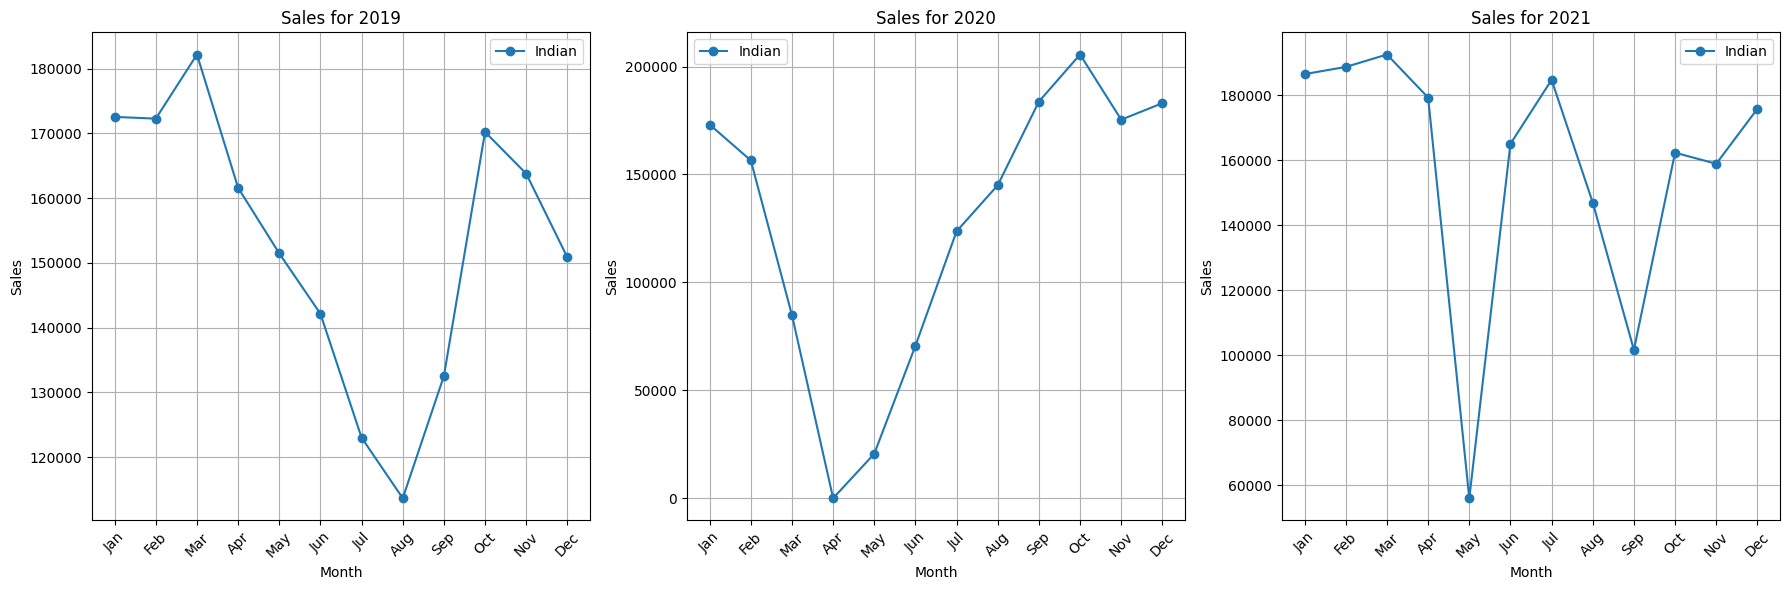

In [6]:
# Plot for each year
plt.figure(figsize=(18, 6))
for i, year in enumerate(years, 1):
    plt.subplot(1, 3, i)
    plt.plot(df_indian[df_indian['Year'] == year].iloc[:, 3:15].sum(axis=0), label='Indian', marker='o')
    plt.xlabel('Month')
    plt.ylabel('Sales')
    plt.title(f'Sales for {year}')
    plt.xticks(range(12), df.columns[3:15], rotation=45)
    plt.legend()
    plt.grid(True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [7]:
DF_indian  = pd.read_csv("Indian_cars.csv")
DF_indian=DF_indian.set_index('index')
DF_indian.head()


Maruti Suzuki   Tata  Mahindra
index                                  
2019-01         132872  17272     22399
2019-02         129936  17818     24520
2019-03         138483  17714     25982
2019-04         129990  12695     18901
2019-05         121012  10900     19541

In [8]:
Maruti_Suzuki = DF_indian['Maruti Suzuki']
Tata = DF_indian['Tata']
Mahindra = DF_indian['Mahindra']

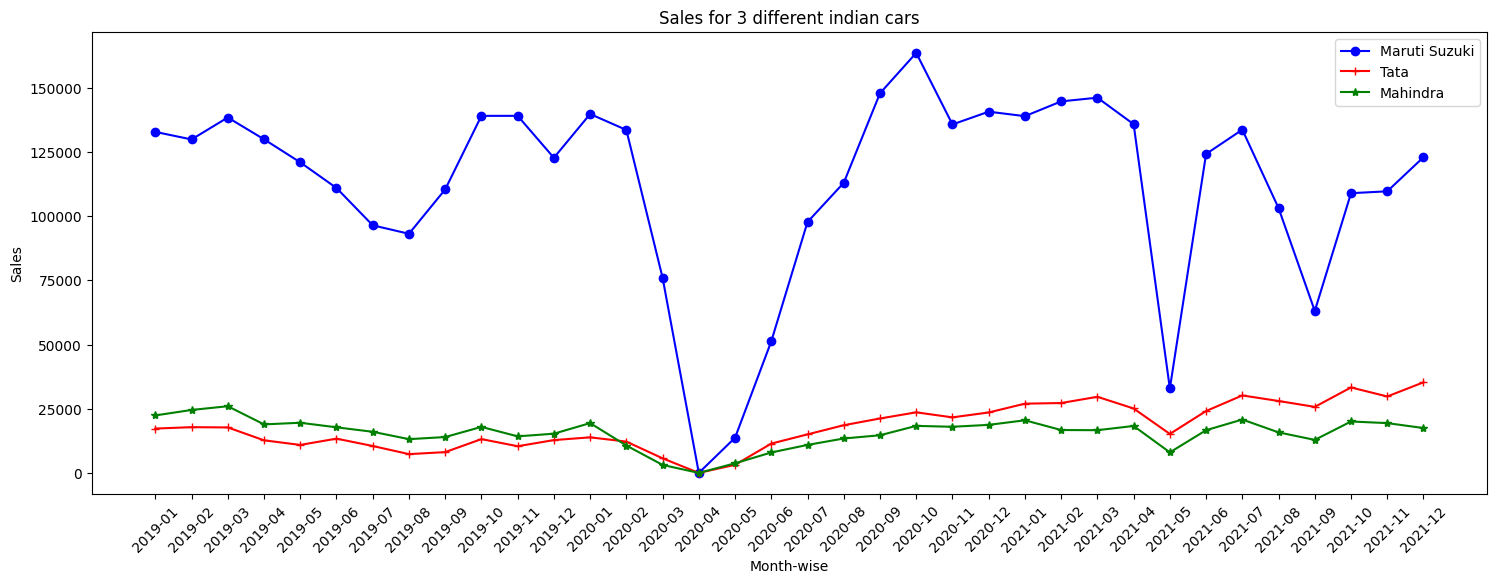

In [9]:
plt.figure(figsize=(18, 6))
plt.plot(DF_indian.index, DF_indian['Maruti Suzuki'], label='Maruti Suzuki', marker='o', color='blue')
plt.plot(DF_indian.index, DF_indian['Tata'], label='Tata', marker='+', color='red')
plt.plot(DF_indian.index, DF_indian['Mahindra'], label='Mahindra', marker='*', color='green')
plt.xticks( rotation=45)
plt.xlabel('Month-wise')
plt.ylabel('Sales')
plt.title(f'Sales for 3 different indian cars')
plt.legend()
plt.show()

In [10]:
Indian_car_result1 = seasonal_decompose(DF_indian['Maruti Suzuki'], model='additive', period=12)
Indian_car_result2 = seasonal_decompose(DF_indian['Tata'], model='additive', period=12)
Indian_car_result3 = seasonal_decompose(DF_indian['Mahindra'], model='additive', period=12)

### Trend 

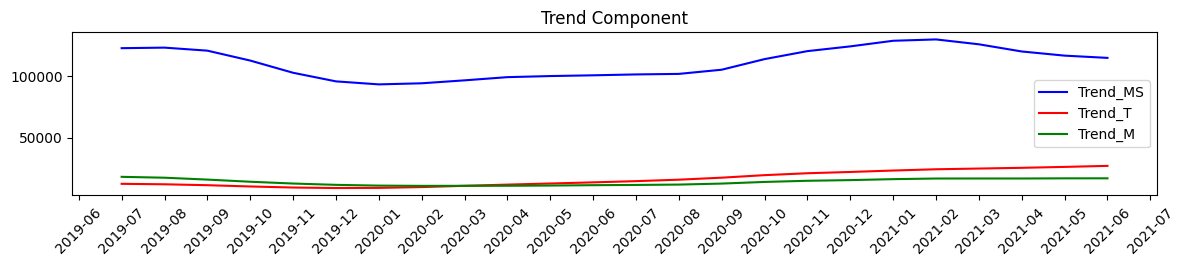

In [11]:
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 2)
plt.plot(Indian_car_result1.trend, label='Trend_MS', color='blue')
plt.plot(Indian_car_result2.trend, label='Trend_T', color='red')
plt.plot(Indian_car_result3.trend, label='Trend_M', color='green')
plt.legend()
plt.title('Trend Component')
plt.tight_layout()
plt.xticks( rotation=45)
plt.show()

### Seasonality

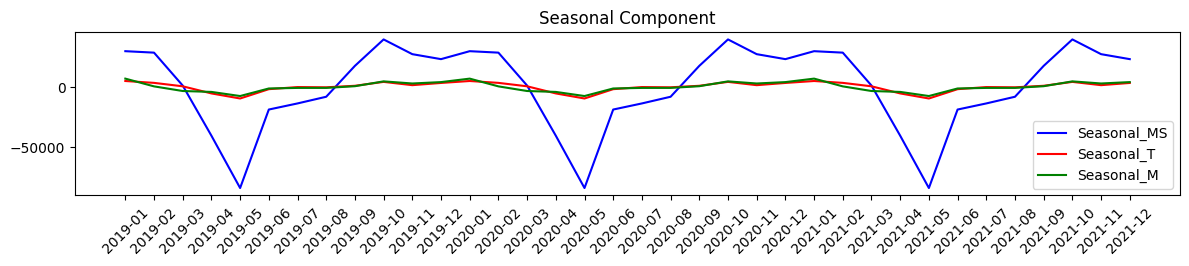

In [12]:
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 3)
plt.plot(Indian_car_result1.seasonal, label='Seasonal_MS', color='blue')
plt.plot(Indian_car_result2.seasonal, label='Seasonal_T', color='red')
plt.plot(Indian_car_result3.seasonal, label='Seasonal_M', color='green')
plt.legend()
plt.title('Seasonal Component')
plt.tight_layout()
plt.xticks( rotation=45)
plt.show()

### Residual


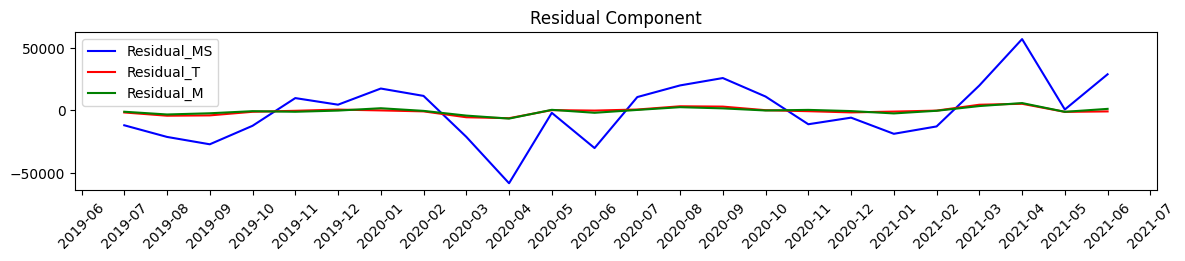

In [13]:
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 4)
plt.plot(Indian_car_result1.resid, label='Residual_MS', color='blue')
plt.plot(Indian_car_result2.resid, label='Residual_T', color='red')
plt.plot(Indian_car_result3.resid, label='Residual_M', color='green')
plt.legend()
plt.title('Residual Component')
plt.tight_layout()
plt.xticks( rotation=45)
plt.show()

# Forecasting for INDIAN CAR COMPANY

In [14]:


train_size_MS = int(len(Maruti_Suzuki) * 0.8)  # Use 80% of the data for training
train0_MS, test0_MS = Maruti_Suzuki[:train_size_MS], Maruti_Suzuki[train_size_MS:]

train_size_M = int(len(Mahindra) * 0.8)  # Use 80% of the data for training
train0_M, test0_M = Mahindra[:train_size_M], Mahindra[train_size_M:]

train_size_T = int(len(Tata) * 0.8)  # Use 80% of the data for training
train0_T, test0_T = Tata[:train_size_T], Tata[train_size_T:]


## Exponential Smoothing

In [18]:
model_M = ExponentialSmoothing(train0_M, seasonal='add', seasonal_periods=12, trend='add', damped_trend=True)
fit_model_M = model_M.fit()

model_MS = ExponentialSmoothing(train0_MS, seasonal='add', seasonal_periods=12, trend='add', damped_trend=True)
fit_model_MS = model_MS.fit()

model_T = ExponentialSmoothing(train0_T, seasonal='add', seasonal_periods=12, trend='add', damped_trend=True)
fit_model_T = model_T.fit()

c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWar

In [19]:
forecast_values_M = fit_model_M.forecast(steps=8)
forecast_values_MS = fit_model_MS.forecast(steps=8)
forecast_values_T = fit_model_T.forecast(steps=8)

### Maruti

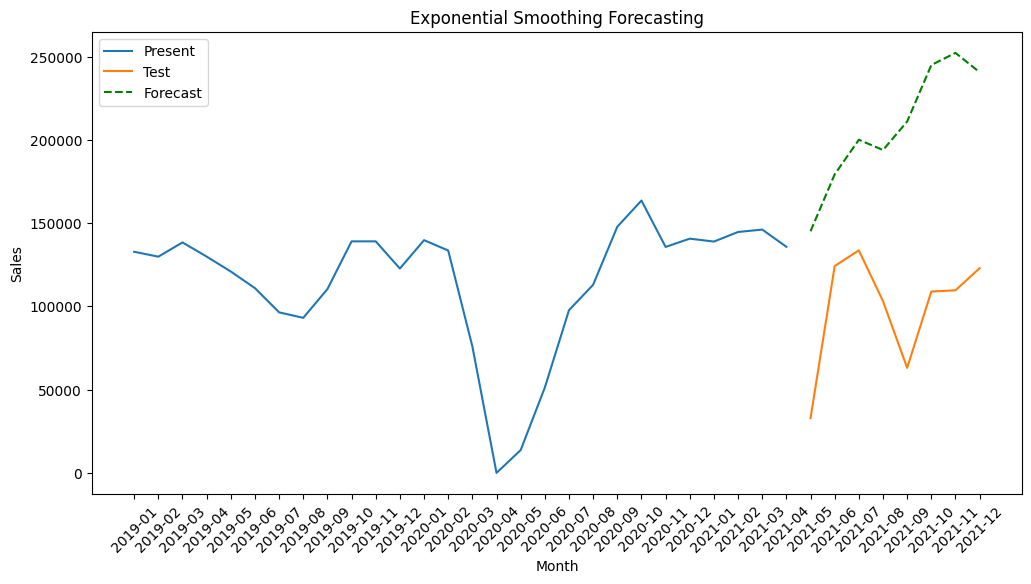

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(train0_MS.index ,train0_MS, label='Present')
plt.plot(test0_MS.index, test0_MS, label='Test')
plt.plot(test0_MS.index ,forecast_values_MS, label='Forecast', linestyle='--', color='green')
plt.title('Exponential Smoothing Forecasting')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks( rotation=45)
plt.legend()
plt.show()

In [21]:
# Calculate Mean Absolute Error (MAE)
mae_MS = mean_absolute_error(test0_MS, forecast_values_MS)
print(f"Mean Absolute Error (MAE): {mae_MS}")

# Calculate Mean Squared Error (MSE)
mse_MS = mean_squared_error(test0_MS, forecast_values_MS)
print(f"Mean Squared Error (MSE): {mse_MS}")

rmse_MS = np.sqrt(mse_MS)
print(f"Root Mean Squared Error (RMSE): {rmse_MS}")

Mean Absolute Error (MAE): 108651.40239924462
Mean Squared Error (MSE): 12870215661.998585
Root Mean Squared Error (RMSE): 113446.97290804451


In [23]:
# RMSE Percentage 
es_rmse_per_MS=(rmse_MS/163656)*100
es_rmse_per_MS

69.32038721956086

### Mahindra

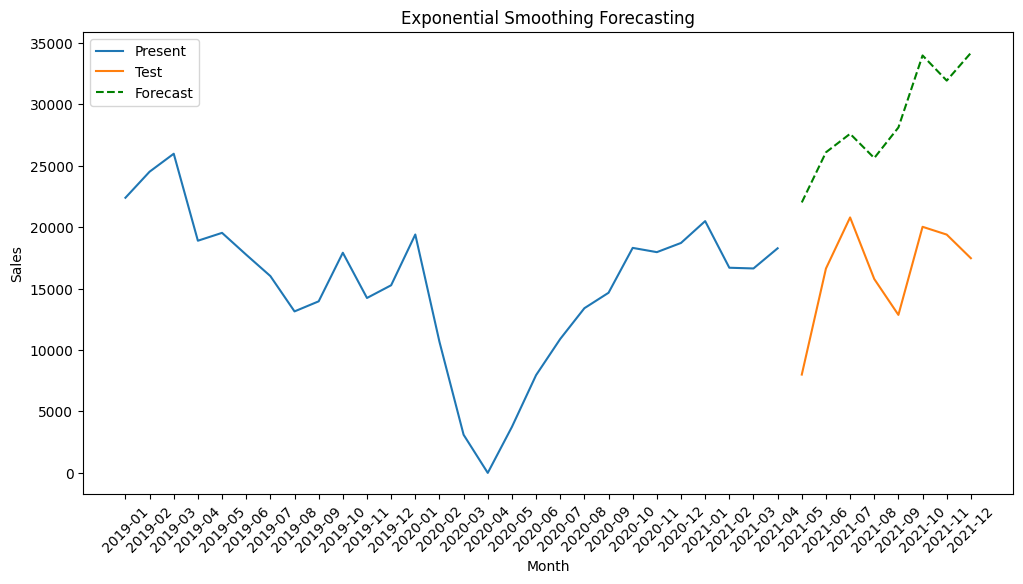

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(train0_M.index ,train0_M, label='Present')
plt.plot(test0_M.index, test0_M, label='Test')
plt.plot(test0_M.index ,forecast_values_M, label='Forecast', linestyle='--', color='green')
plt.title('Exponential Smoothing Forecasting')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks( rotation=45)
plt.legend()
plt.show()

In [25]:
# Calculate Mean Absolute Error (MAE)
mae_M = mean_absolute_error(test0_M, forecast_values_M)
print(f"Mean Absolute Error (MAE): {mae_M}")

# Calculate Mean Squared Error (MSE)
mse_M = mean_squared_error(test0_M, forecast_values_M)
print(f"Mean Squared Error (MSE): {mse_M}")

rmse_M = np.sqrt(mse_M)
print(f"Root Mean Squared Error (RMSE): {rmse_M}")

Mean Absolute Error (MAE): 12324.05671806529
Mean Squared Error (MSE): 161654067.50221997
Root Mean Squared Error (RMSE): 12714.325286943857


In [53]:
es_rmse_per_M=(rmse_M/25982)*100
es_rmse_per_M

48.935129270047945

### Tata

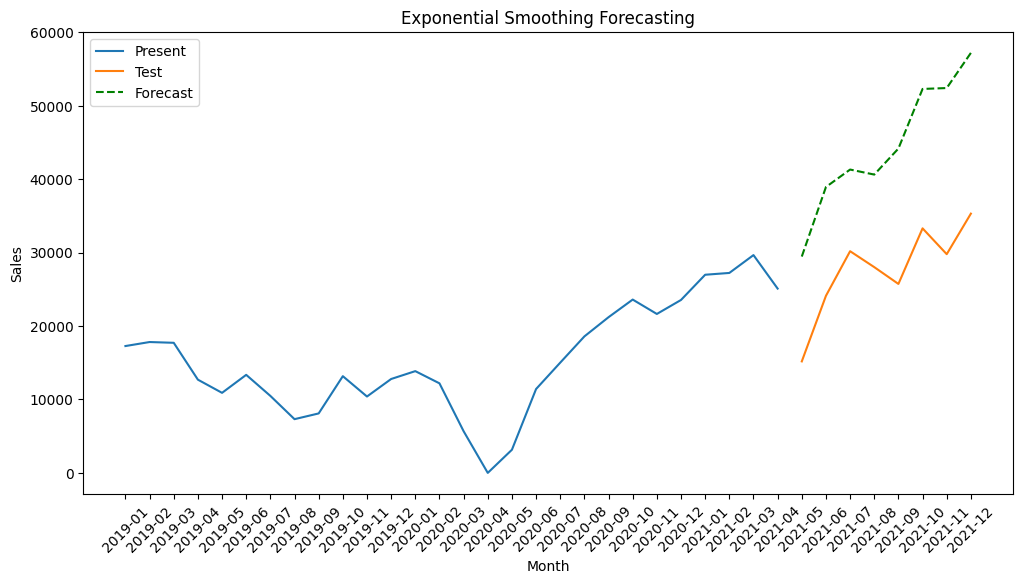

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(train0_T.index ,train0_T, label='Present')
plt.plot(test0_T.index, test0_T, label='Test')
plt.plot(test0_T.index ,forecast_values_T, label='Forecast', linestyle='--', color='green')
plt.title('Exponential Smoothing Forecasting')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks( rotation=45)
plt.legend()
plt.show()

In [28]:
# Calculate Mean Absolute Error (MAE)
mae_T = mean_absolute_error(test0_T, forecast_values_T)
print(f"Mean Absolute Error (MAE): {mae_T}")

# Calculate Mean Squared Error (MSE)
mse_T = mean_squared_error(test0_T, forecast_values_T)
print(f"Mean Squared Error (MSE): {mse_T}")

rmse_T = np.sqrt(mse_T)
print(f"Root Mean Squared Error (RMSE): {rmse_T}")

Mean Absolute Error (MAE): 16841.52722793193
Mean Squared Error (MSE): 299557738.9915654
Root Mean Squared Error (RMSE): 17307.736391324124


In [54]:
es_rmse_per_T=(rmse_M/35300)*100
es_rmse_per_T

36.01791865989761

## Moving Average Forecasting

In [15]:
# Calculate Simple Moving Average (SMA)
window_size = 3  # Adjust the window size as needed
sma_M = Mahindra.rolling(window=window_size).mean()
sma_MS = Maruti_Suzuki.rolling(window=window_size).mean()
sma_T = Tata.rolling(window=window_size).mean()

In [16]:
train_size_MS = int(len(Maruti_Suzuki) * 0.8)  # Use 80% of the data for training
train0_MS, test0_MS = Maruti_Suzuki[:train_size_MS], Maruti_Suzuki[train_size_MS:]

train_size_M = int(len(Mahindra) * 0.8)  # Use 80% of the data for training
train0_M, test0_M = Mahindra[:train_size_M], Mahindra[train_size_M:]

train_size_T = int(len(Tata) * 0.8)  # Use 80% of the data for training
train0_T, test0_T = Tata[:train_size_T], Tata[train_size_T:]

In [17]:
window_size = 3  # Adjust the window size as needed
sma_M = Mahindra.rolling(window=window_size).mean()
sma_MS = Maruti_Suzuki.rolling(window=window_size).mean()
sma_T = Tata.rolling(window=window_size).mean()
forecast_values_sma_M = sma_M[train_size_M:]
forecast_values_sma_MS = sma_MS[train_size_MS:]
forecast_values_sma_T = sma_T[train_size_T:]

In [52]:
def moving_average_forecast(data, window_size, future_periods):
    forecast = []
    for i in range(len(data) - window_size + 1):
        window = data[i:i + window_size]
        forecast.append(sum(window) / len(window))
    # Use the last value of the moving average as the forecast for future periods
    last_window = data[-window_size:]
    last_average = sum(last_window) / len(last_window)
    for i in range(future_periods):
        forecast.append(last_average)
    return forecast

# Example usage:
data = Maruti_Suzuki
window_size = 3
future_periods = 2
forecast_MS = moving_average_forecast(data, window_size, future_periods)
Forecast_MS = pd.Series(forecast_MS,index=['2022-01','2022-02','2022-03','2022-04','2022-05','2022-06','2022-07','2022-08','2022-09','2022-10','2022-11','2022-12',
                                            '2023-01','2023-02','2023-03','2023-04','2023-05','2023-06','2023-07','2023-08','2023-09','2023-10','2023-11','2023-12',
                                            '2024-01','2024-02','2024-03','2024-04','2024-05','2024-06','2024-07','2024-08','2024-09','2024-10','2024-11','2024-12'])
#print("Original Data:", data)
print("Moving Average Forecast:", forecast_MS)
print(len(forecast_MS))
print(Forecast_MS.tail(15))



Moving Average Forecast: [133763.66666666666, 132803.0, 129828.33333333333, 120672.0, 109501.33333333333, 100221.66666666667, 100035.0, 114249.33333333333, 129569.33333333333, 133679.33333333334, 133920.0, 132086.33333333334, 116504.66666666667, 69890.33333333333, 29913.666666666668, 21658.666666666668, 54248.0, 87358.33333333333, 119571.0, 141533.66666666666, 149114.33333333334, 146728.33333333334, 138510.33333333334, 141505.66666666666, 143322.0, 142281.0, 104995.0, 97687.33333333333, 96971.66666666667, 120399.66666666667, 100010.0, 91763.0, 93941.33333333333, 113909.66666666667, 113909.66666666667, 113909.66666666667]
36
2023-10    146728.333333
2023-11    138510.333333
2023-12    141505.666667
2024-01    143322.000000
2024-02    142281.000000
2024-03    104995.000000
2024-04     97687.333333
2024-05     96971.666667
2024-06    120399.666667
2024-07    100010.000000
2024-08     91763.000000
2024-09     93941.333333
2024-10    113909.666667
2024-11    113909.666667
2024-12    113909.

In [54]:
def moving_average_forecast(data, window_size, future_periods):
    forecast = []
    for i in range(len(data) - window_size + 1):
        window = data[i:i + window_size]
        forecast.append(sum(window) / len(window))
    # Use the last value of the moving average as the forecast for future periods
    last_window = data[-window_size:]
    last_average = sum(last_window) / len(last_window)
    for i in range(future_periods):
        forecast.append(last_average)
    return forecast

# Example usage:
data = Mahindra
window_size = 3
future_periods = 2
forecast_M = moving_average_forecast(data, window_size, future_periods)
Forecast_M = pd.Series(forecast_M,index=['2022-01','2022-02','2022-03','2022-04','2022-05','2022-06','2022-07','2022-08','2022-09','2022-10','2022-11','2022-12',
                                            '2023-01','2023-02','2023-03','2023-04','2023-05','2023-06','2023-07','2023-08','2023-09','2023-10','2023-11','2023-12',
                                            '2024-01','2024-02','2024-03','2024-04','2024-05','2024-06','2024-07','2024-08','2024-09','2024-10','2024-11','2024-12'])
#print("Original Data:", data)
#print("Moving Average Forecast:", forecast_M)
print(len(forecast_M))
print(Forecast_M.tail(12))


36
2024-01    17947.666667
2024-02    17210.000000
2024-03    14310.666667
2024-04    14308.333333
2024-05    15145.666667
2024-06    17739.666667
2024-07    16482.000000
2024-08    16227.666667
2024-09    17432.333333
2024-10    18970.000000
2024-11    18970.000000
2024-12    18970.000000
dtype: float64


In [57]:
def moving_average_forecast(data, window_size, future_periods):
    forecast = []
    for i in range(len(data) - window_size + 1):
        window = data[i:i + window_size]
        forecast.append(sum(window) / len(window))
    # Use the last value of the moving average as the forecast for future periods
    last_window = data[-window_size:]
    last_average = sum(last_window) / len(last_window)
    for i in range(future_periods):
        forecast.append(last_average)
    return forecast

# Example usage:
data = Tata
window_size = 3
future_periods = 2
forecast_T = moving_average_forecast(data, window_size, future_periods)
Forecast_T = pd.Series(forecast_T,index=['2022-01','2022-02','2022-03','2022-04','2022-05','2022-06','2022-07','2022-08','2022-09','2022-10','2022-11','2022-12',
                                            '2023-01','2023-02','2023-03','2023-04','2023-05','2023-06','2023-07','2023-08','2023-09','2023-10','2023-11','2023-12',
                                            '2024-01','2024-02','2024-03','2024-04','2024-05','2024-06','2024-07','2024-08','2024-09','2024-10','2024-11','2024-12'])
#print("Original Data:", data)
#print("Moving Average Forecast:", forecast_T)
print(len(forecast_T))
print(Forecast_T.tail(12))


36
2024-01    27953.000000
2024-02    27324.666667
2024-03    23310.333333
2024-04    21462.333333
2024-05    23158.666667
2024-06    27437.333333
2024-07    27976.666667
2024-08    29014.000000
2024-09    29601.666667
2024-10    32792.000000
2024-11    32792.000000
2024-12    32792.000000
dtype: float64


In [68]:
df1 = pd.read_csv('df_forecast_indian.csv')

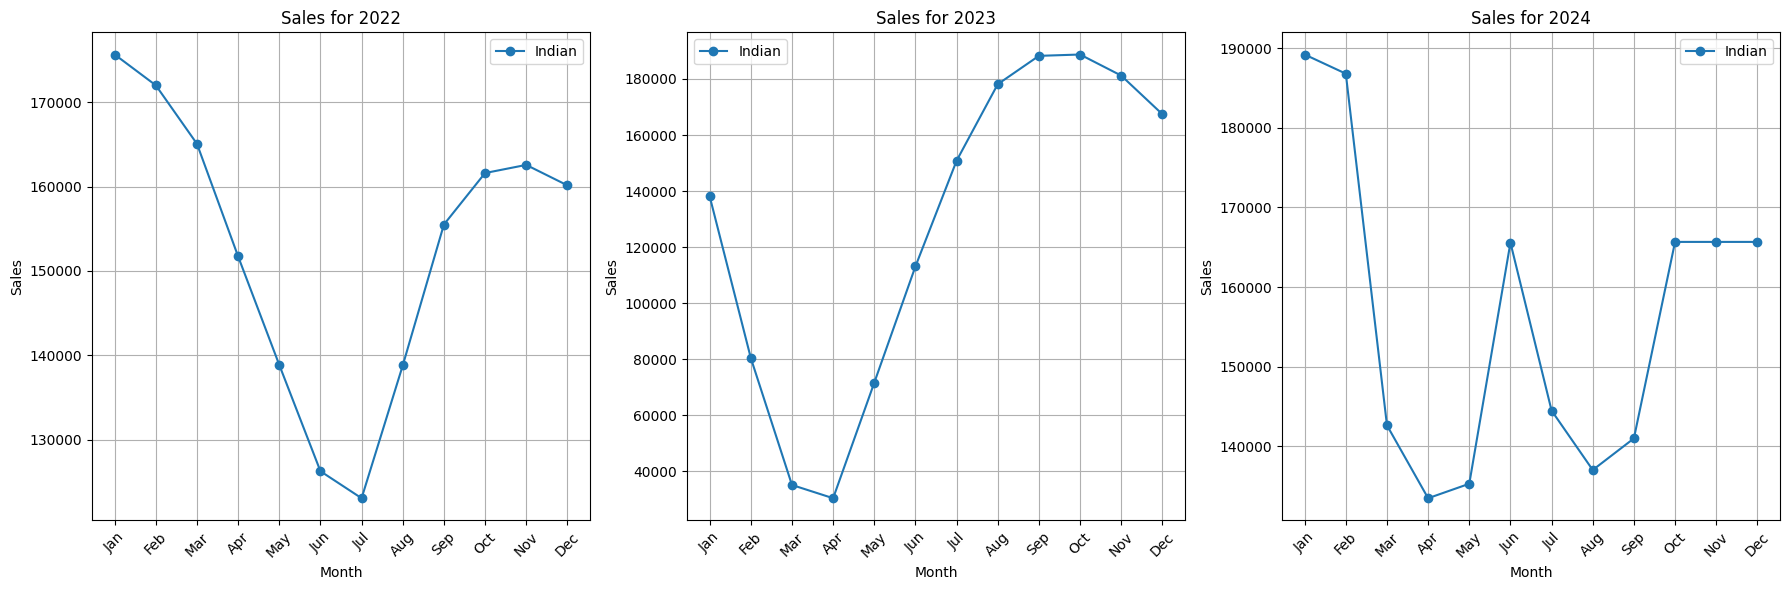

In [70]:
years=[2022,2023,2024]
plt.figure(figsize=(18, 6))
for i, year in enumerate(years, 1):
    plt.subplot(1, 3, i)
    plt.plot(df1[df1['Year'] == year].iloc[:, 3:15].sum(axis=0), label='Indian', marker='o')
    plt.xlabel('Month')
    plt.ylabel('Sales')
    plt.title(f'Sales for {year}')
    plt.xticks(range(12), df.columns[3:15], rotation=45)
    plt.legend()
    plt.grid(True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()



### Mahindra

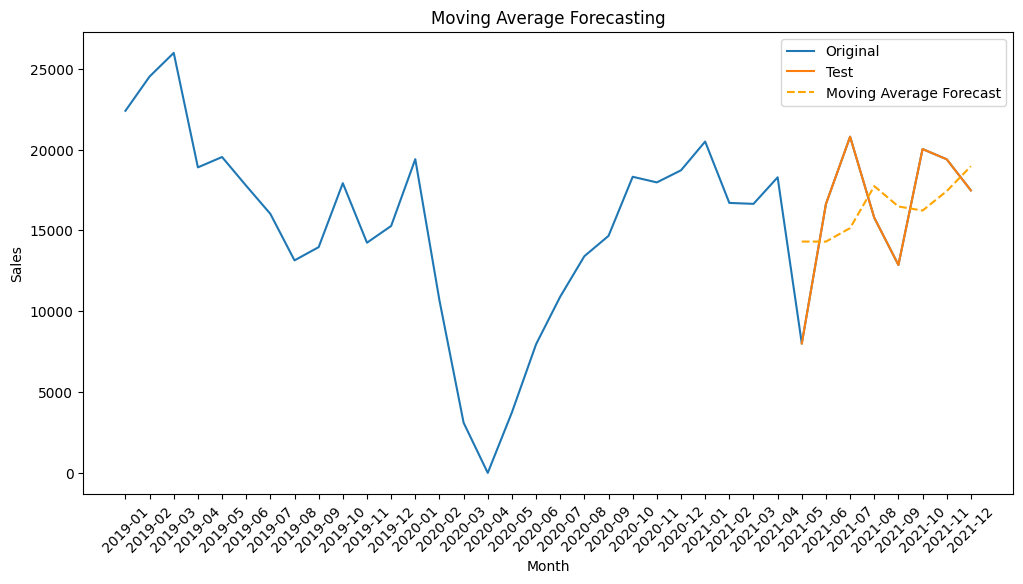

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(Mahindra, label='Original')
plt.plot(test0_M.index, test0_M, label='Test')
plt.plot(test0_M.index, forecast_values_sma_M, label='Moving Average Forecast', linestyle='--', color='orange')
plt.title('Moving Average Forecasting')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks( rotation=45)
plt.legend()
plt.show()

In [19]:
# Calculate Mean Absolute Error (MAE)
mae_1_M = mean_absolute_error(test0_M, forecast_values_sma_M)
print(f"Mean Absolute Error (MAE): {mae_1_M}")

# Calculate Mean Squared Error (MSE)
mse_1_M = mean_squared_error(test0_M, forecast_values_sma_M)
print(f"Mean Squared Error (MSE): {mse_1_M}")

rmse_1_M = np.sqrt(mse_1_M)
print(f"Root Mean Squared Error (RMSE): {rmse_1_M}")

Mean Absolute Error (MAE): 3390.791666666667
Mean Squared Error (MSE): 14329442.625000002
Root Mean Squared Error (RMSE): 3785.425025674132


In [55]:
ma_rmse_per_M=(rmse_1_M/25982)*100
ma_rmse_per_M

14.56941353888897

### Maruti 

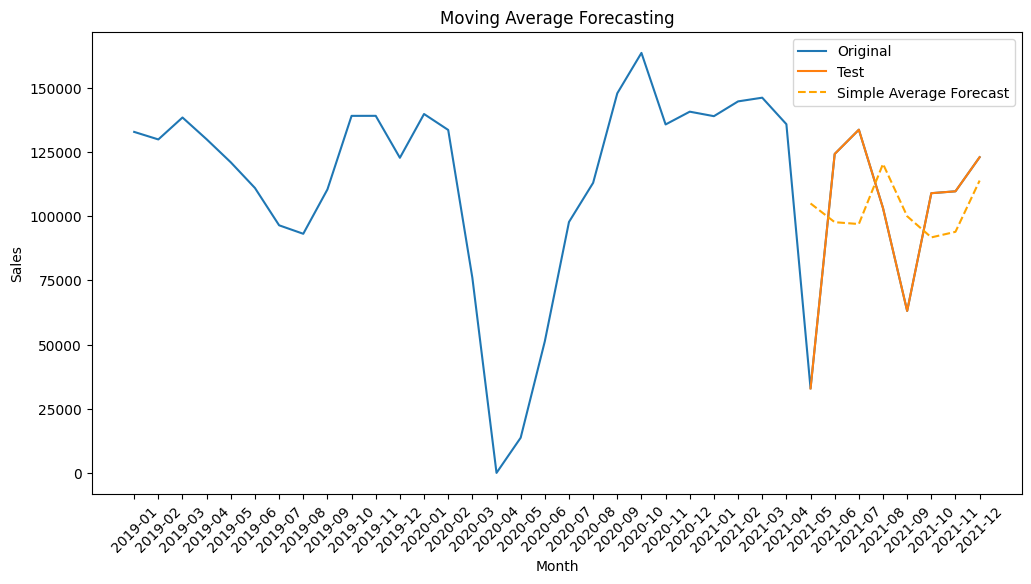

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(Maruti_Suzuki, label='Original')
plt.plot(test0_MS.index, test0_MS, label='Test')
plt.plot(test0_MS.index, forecast_values_sma_MS, label='Simple Average Forecast', linestyle='--', color='orange')
plt.title('Moving Average Forecasting')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks( rotation=45)
plt.legend()
plt.show()

In [37]:
# Calculate Mean Absolute Error (MAE)
mae_1_MS = mean_absolute_error(test0_MS, forecast_values_sma_MS)
print(f"Mean Absolute Error (MAE): {mae_1_MS}")

# Calculate Mean Squared Error (MSE)
mse_1_MS = mean_squared_error(test0_MS, forecast_values_sma_MS)
print(f"Mean Squared Error (MSE): {mse_1_MS}")

rmse_1_MS = np.sqrt(mse_1_MS)
print(f"Root Mean Squared Error (RMSE): {rmse_1_MS}")

Mean Absolute Error (MAE): 28958.958333333336
Mean Squared Error (MSE): 1192789914.6527777
Root Mean Squared Error (RMSE): 34536.790740495526


In [38]:
ma_rmse_per_MS=(rmse_1_MS/163656)*100
ma_rmse_per_MS

21.10328416953581

### Tata

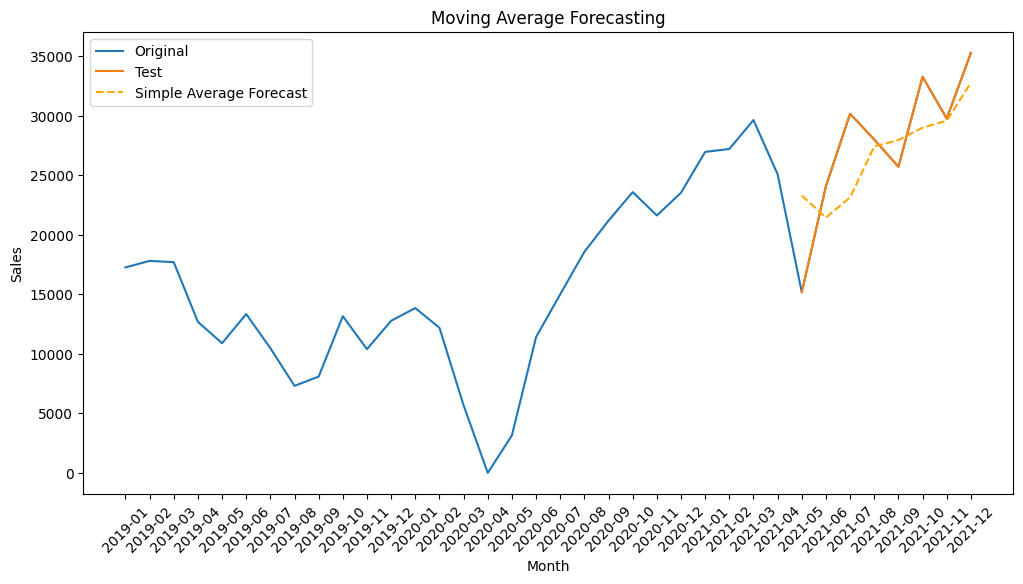

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(Tata, label='Original')
plt.plot(test0_T.index, test0_T, label='Test')
plt.plot(test0_T.index, forecast_values_sma_T, label='Simple Average Forecast', linestyle='--', color='orange')
plt.title('Moving Average Forecasting')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks( rotation=45)
plt.legend()
plt.show()

In [40]:
# Calculate Mean Absolute Error (MAE)
mae_1_T = mean_absolute_error(test0_T, forecast_values_sma_T)
print(f"Mean Absolute Error (MAE): {mae_1_T}")

# Calculate Mean Squared Error (MSE)
mse_1_T = mean_squared_error(test0_T, forecast_values_sma_T)
print(f"Mean Squared Error (MSE): {mse_1_T}")

rmse_1_T = np.sqrt(mse_1_T)
print(f"Root Mean Squared Error (RMSE): {rmse_1_T}")

Mean Absolute Error (MAE): 3449.875
Mean Squared Error (MSE): 19062776.70833333
Root Mean Squared Error (RMSE): 4366.093987574401


In [56]:
ma_rmse_per_T=(rmse_1_T/35300)*100
ma_rmse_per_T

12.368538208426063

## ARIMA

### Grid Search for Maruti

In [42]:
# Grid Method
from statsmodels.tsa.arima.model import ARIMA
import itertools

# Define the range of p, d, and q values
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)

# Generate all possible combinations of p, d, and q values
parameters = itertools.product(p_values, d_values, q_values)

# Fit ARIMA models for all combinations and select the best model
best_aic = float("inf")
best_params = None
for param in parameters:
    try:
        model = ARIMA(Maruti_Suzuki, order=param)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_params = param
    except:
        continue

print("Best AIC:", best_aic)
print("Best Parameters:", best_params)

c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mahim\AppData\Local\Programs\Python\Python312\L

Best AIC: 832.7363526150114
Best Parameters: (0, 1, 0)


### Grid Search for Mahindra

In [43]:
# Grid Method
from statsmodels.tsa.arima.model import ARIMA
import itertools

# Define the range of p, d, and q values
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)

# Generate all possible combinations of p, d, and q values
parameters = itertools.product(p_values, d_values, q_values)

# Fit ARIMA models for all combinations and select the best model
best_aic = float("inf")
best_params = None
for param in parameters:
    try:
        model = ARIMA(Mahindra, order=param)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_params = param
    except:
        continue

print("Best AIC:", best_aic)
print("Best Parameters:", best_params)

c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mahim\AppData\Local\Programs\Python\Python312\L

Best AIC: 686.166635434257
Best Parameters: (0, 1, 0)


### Grid Search for Tata

In [44]:
# Grid Method
from statsmodels.tsa.arima.model import ARIMA
import itertools

# Define the range of p, d, and q values
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)

# Generate all possible combinations of p, d, and q values
parameters = itertools.product(p_values, d_values, q_values)

# Fit ARIMA models for all combinations and select the best model
best_aic = float("inf")
best_params = None
for param in parameters:
    try:
        model = ARIMA(Tata, order=param)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_params = param
    except:
        continue

print("Best AIC:", best_aic)
print("Best Parameters:", best_params)

c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mahim\AppData\Local\Programs\Python\Python312\L

Best AIC: 687.6112221448086
Best Parameters: (0, 1, 0)


c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [45]:
train_size_MS = int(len(Maruti_Suzuki) * 0.8)  # Use 80% of the data for training
train0_MS, test0_MS = Maruti_Suzuki[:train_size_MS], Maruti_Suzuki[train_size_MS:]

train_size_M = int(len(Mahindra) * 0.8)  # Use 80% of the data for training
train0_M, test0_M = Mahindra[:train_size_M], Mahindra[train_size_M:]

train_size_T = int(len(Tata) * 0.8)  # Use 80% of the data for training
train0_T, test0_T = Tata[:train_size_T], Tata[train_size_T:]

In [46]:
A_model_M = ARIMA(Mahindra, order=(0,1,0))  # Specify order (p, d, q)
fitted_model_M = A_model_M.fit()

A_model_MS = ARIMA(Maruti_Suzuki, order=(0,1,0))  # Specify order (p, d, q)
fitted_model_MS = A_model_MS.fit()

A_model_T = ARIMA(Tata, order=(0,1,0))  # Specify order (p, d, q)
fitted_model_T = A_model_T.fit()

c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mahim\AppData\Local\Programs\Python\Python312\L

In [47]:
# Example: Make forecasts
forecast_M = fitted_model_M.forecast(steps=12)  # Specify the number of forecast steps
forecast_MS = fitted_model_MS.forecast(steps=12)  # Specify the number of forecast steps
forecast_T = fitted_model_T.forecast(steps=12)  # Specify the number of forecast steps

### Mahindra

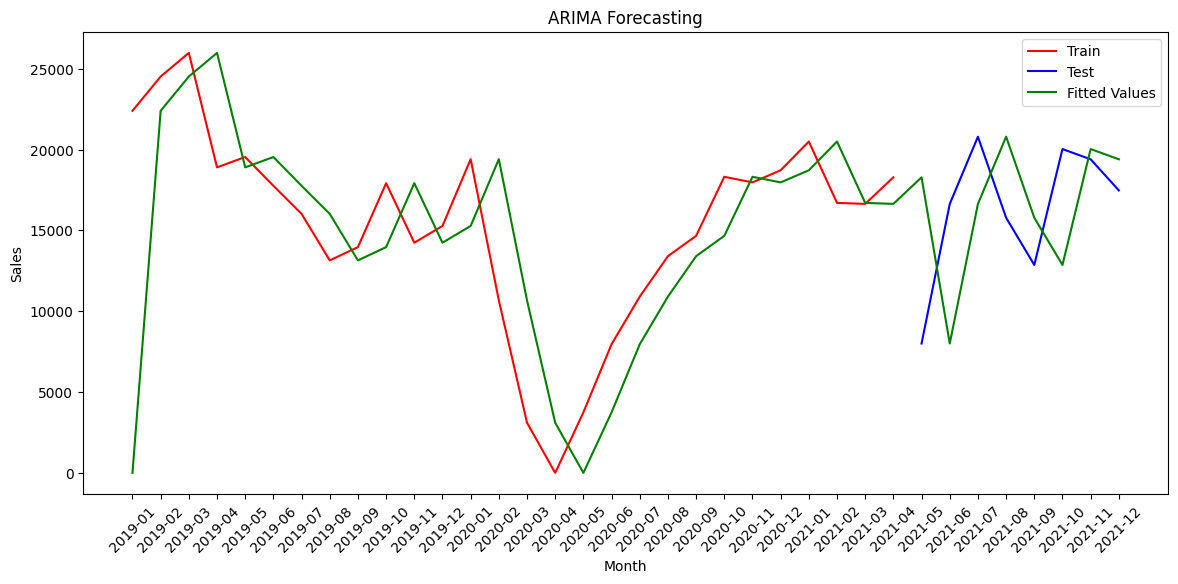

In [48]:
# Example: Visualize results
plt.figure(figsize=(14, 6))
plt.plot(train0_M.index, train0_M, label='Train', color='red')
plt.plot(test0_M.index, test0_M, label='Test',color='blue')
plt.plot(fitted_model_M.fittedvalues, color='green', label='Fitted Values')
plt.title('ARIMA Forecasting')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks( rotation=45)
plt.legend()
plt.show()

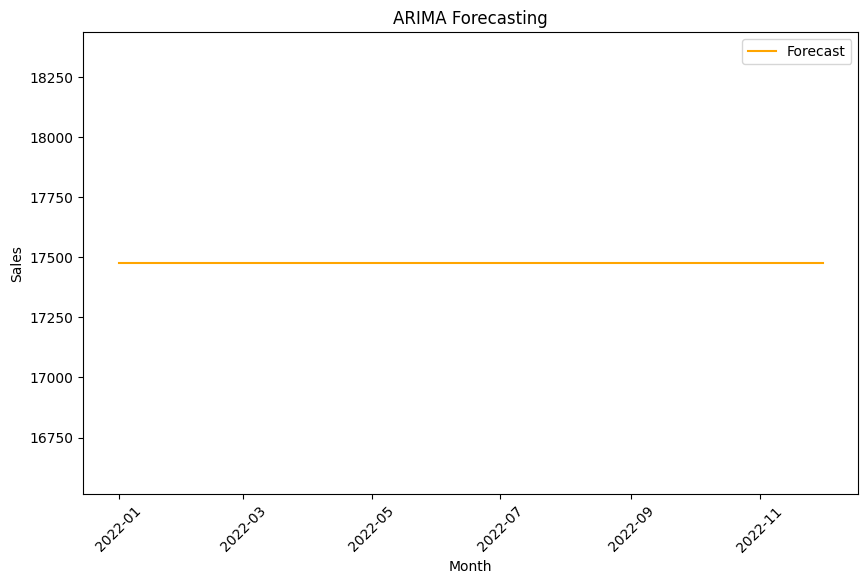

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(forecast_M, color='orange', label='Forecast')
plt.title('ARIMA Forecasting')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks( rotation=45)
plt.legend()
plt.show()

In [50]:
A_forecast_values_M = fitted_model_M.forecast(steps=len(test0_M))

# Calculate Mean Absolute Error (MAE)
mae_2_M = mean_absolute_error(test0_M, A_forecast_values_M)
print(f"Mean Absolute Error (MAE): {mae_2_M}")

# Calculate Mean Squared Error (MSE)
mse_2_M = mean_squared_error(test0_M, A_forecast_values_M)
print(f"Mean Squared Error (MSE): {mse_2_M}")

rmse_2_M = np.sqrt(mse_2_M)
print(f"Root Mean Squared Error (RMSE): {rmse_2_M}")

Mean Absolute Error (MAE): 3052.25
Mean Squared Error (MSE): 16979304.25
Root Mean Squared Error (RMSE): 4120.595132987467


In [57]:
ar_rmse_per_M=(rmse_2_M/25982)*100
ar_rmse_per_M

15.859422419319017

### Maruti

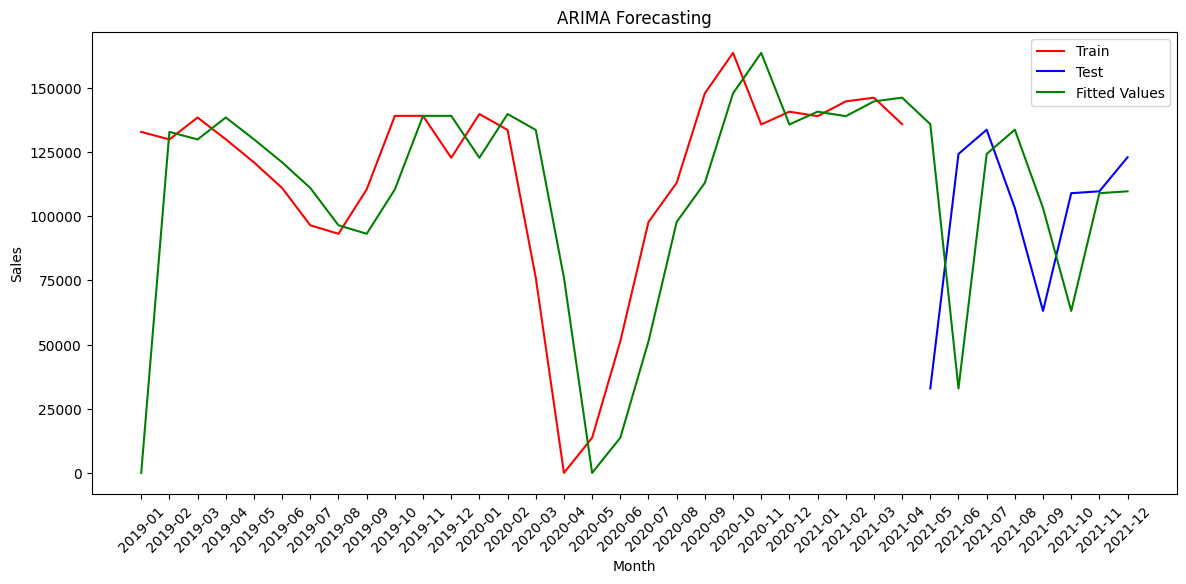

In [58]:
# Example: Visualize results
plt.figure(figsize=(14, 6))
plt.plot(train0_MS.index, train0_MS, label='Train', color='red')
plt.plot(test0_MS.index, test0_MS, label='Test',color='blue')
plt.plot(fitted_model_MS.fittedvalues, color='green', label='Fitted Values')
plt.title('ARIMA Forecasting')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks( rotation=45)
plt.legend()
plt.show()

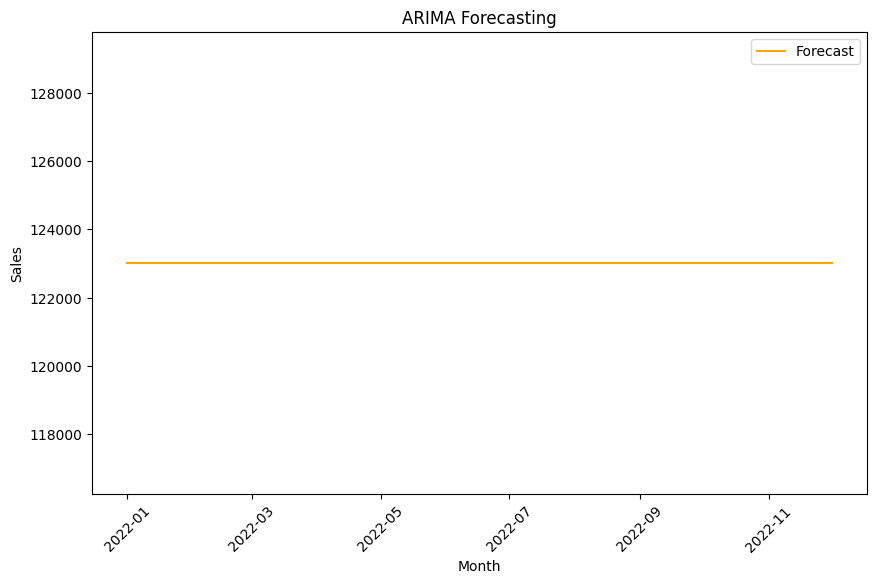

In [59]:
plt.figure(figsize=(10, 6))
plt.plot(forecast_MS, color='orange', label='Forecast')
plt.title('ARIMA Forecasting')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks( rotation=45)
plt.legend()
plt.show()

In [60]:
A_forecast_values_MS = fitted_model_MS.forecast(steps=len(test0_MS))

# Calculate Mean Absolute Error (MAE)
mae_2_MS = mean_absolute_error(test0_MS, A_forecast_values_MS)
print(f"Mean Absolute Error (MAE): {mae_2_MS}")

# Calculate Mean Squared Error (MSE)
mse_2_MS = mean_squared_error(test0_MS, A_forecast_values_MS)
print(f"Mean Squared Error (MSE): {mse_2_MS}")

rmse_2_MS = np.sqrt(mse_2_MS)
print(f"Root Mean Squared Error (RMSE): {rmse_2_MS}")

Mean Absolute Error (MAE): 26143.25
Mean Squared Error (MSE): 1574001556.0
Root Mean Squared Error (RMSE): 39673.68845973361


In [61]:
ar_rmse_per_MS=(rmse_2_MS/163656)*100
ar_rmse_per_MS

24.24212278177006

### Tata


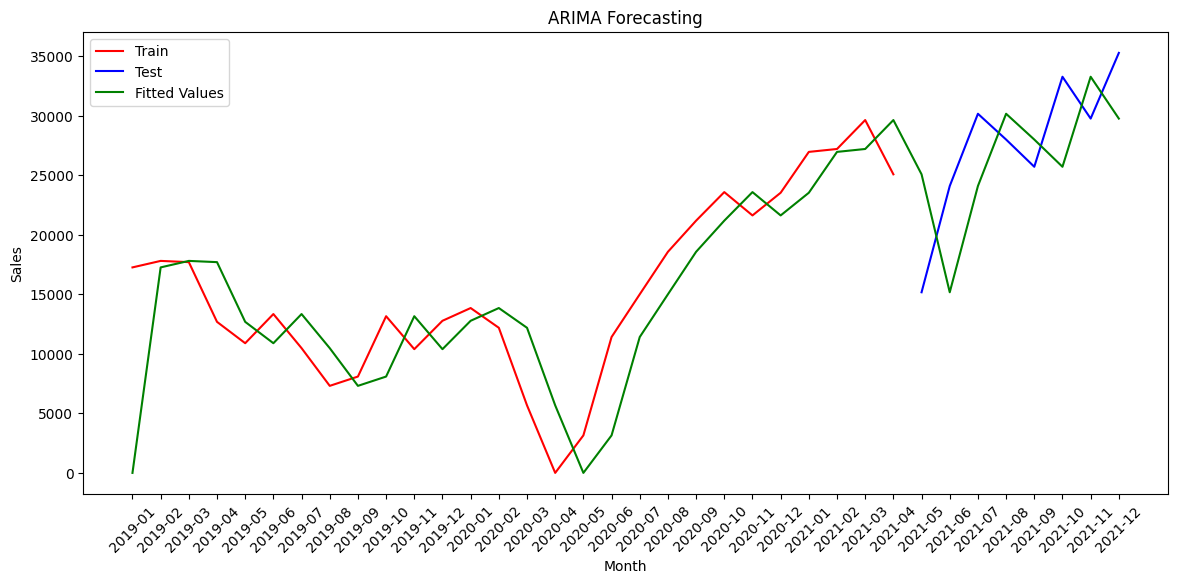

In [62]:
# Example: Visualize results
plt.figure(figsize=(14, 6))
plt.plot(train0_T.index, train0_T, label='Train', color='red')
plt.plot(test0_T.index, test0_T, label='Test',color='blue')
plt.plot(fitted_model_T.fittedvalues, color='green', label='Fitted Values')
plt.title('ARIMA Forecasting')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks( rotation=45)
plt.legend()
plt.show()

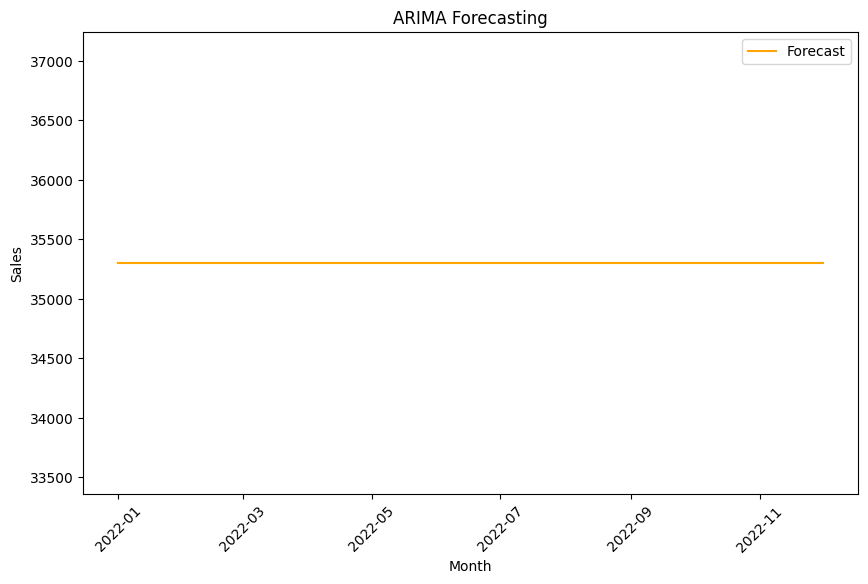

In [63]:
plt.figure(figsize=(10, 6))
plt.plot(forecast_T, color='orange', label='Forecast')
plt.title('ARIMA Forecasting')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks( rotation=45)
plt.legend()
plt.show()

In [64]:
A_forecast_values_T = fitted_model_T.forecast(steps=len(test0_T))

# Calculate Mean Absolute Error (MAE)
mae_2_T = mean_absolute_error(test0_T, A_forecast_values_T)
print(f"Mean Absolute Error (MAE): {mae_2_T}")

# Calculate Mean Squared Error (MSE)
mse_2_T = mean_squared_error(test0_T, A_forecast_values_T)
print(f"Mean Squared Error (MSE): {mse_2_T}")

rmse_2_T = np.sqrt(mse_2_T)
print(f"Root Mean Squared Error (RMSE): {rmse_2_T}")

Mean Absolute Error (MAE): 7600.25
Mean Squared Error (MSE): 91909235.5
Root Mean Squared Error (RMSE): 9586.930452444098


In [65]:
ar_rmse_per_T=(rmse_2_T/35300)*100
ar_rmse_per_T

27.15844320805693

## SARIMA

In [66]:
from pmdarima import auto_arima

# Use auto_arima to search for the best-fitting SARIMA model
model = auto_arima(Mahindra, seasonal=True, m=12)
print(model.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   36
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -349.304
Date:                Mon, 25 Mar 2024   AIC                            704.607
Time:                        20:34:02   BIC                            709.358
Sample:                    01-01-2019   HQIC                           706.265
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4508.5953   1811.765      2.489      0.013     957.601    8059.590
ar.L1          0.7198      0.112      6.417      0.000       0.500       0.940
sigma2      1.516e+07      0.154   9.83e+07      0.0

In [67]:
from pmdarima import auto_arima

# Use auto_arima to search for the best-fitting SARIMA model
model = auto_arima(Maruti_Suzuki, seasonal=True, m=12)
print(model.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   36
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -422.905
Date:                Mon, 25 Mar 2024   AIC                            851.809
Time:                        20:34:04   BIC                            856.560
Sample:                    01-01-2019   HQIC                           853.468
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.584e+04   1.39e+04      3.297      0.001    1.86e+04    7.31e+04
ar.L1          0.5942      0.131      4.549      0.000       0.338       0.850
sigma2      9.429e+08      0.037   2.55e+10      0.0

In [68]:
from pmdarima import auto_arima

# Use auto_arima to search for the best-fitting SARIMA model
model = auto_arima(Tata, seasonal=True, m=12)
print(model.summary())


                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                   36
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -225.576
Date:                              Mon, 25 Mar 2024   AIC                            455.153
Time:                                      20:34:13   BIC                            457.424
Sample:                                  01-01-2019   HQIC                           455.724
                                       - 12-01-2021                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.7071      0.667     -1.059      0.289      -2.015       0.601
sigma2      1.715e+

In [69]:
train_size_MS = int(len(Maruti_Suzuki) * 0.8)  # Use 80% of the data for training
train0_MS, test0_MS = Maruti_Suzuki[:train_size_MS], Maruti_Suzuki[train_size_MS:]

train_size_M = int(len(Mahindra) * 0.8)  # Use 80% of the data for training
train0_M, test0_M = Mahindra[:train_size_M], Mahindra[train_size_M:]

train_size_T = int(len(Tata) * 0.8)  # Use 80% of the data for training
train0_T, test0_T = Tata[:train_size_T], Tata[train_size_T:]

In [70]:
# Example: Fit SARIMA model
S_model_T = SARIMAX(Tata, order=(0, 1, 0), seasonal_order=(0, 1, 1, 12))
S_fitted_model_T = S_model_T.fit()

S_model_MS = SARIMAX(Maruti_Suzuki, order=(1,0, 0), seasonal_order=(0,0,1, 12))
S_fitted_model_MS = S_model_MS.fit()

S_model_M = SARIMAX(Mahindra, order=(1, 0, 0), seasonal_order=(0,  0, 1, 12))
S_fitted_model_M = S_model_M.fit()


c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.


In [71]:
# Example: Make forecasts
S_forecast_T = S_fitted_model_T.forecast(steps=12)  # Specify the number of forecast steps

S_forecast_MS = S_fitted_model_MS.forecast(steps=12)

S_forecast_M = S_fitted_model_M.forecast(steps=12)

### Tata

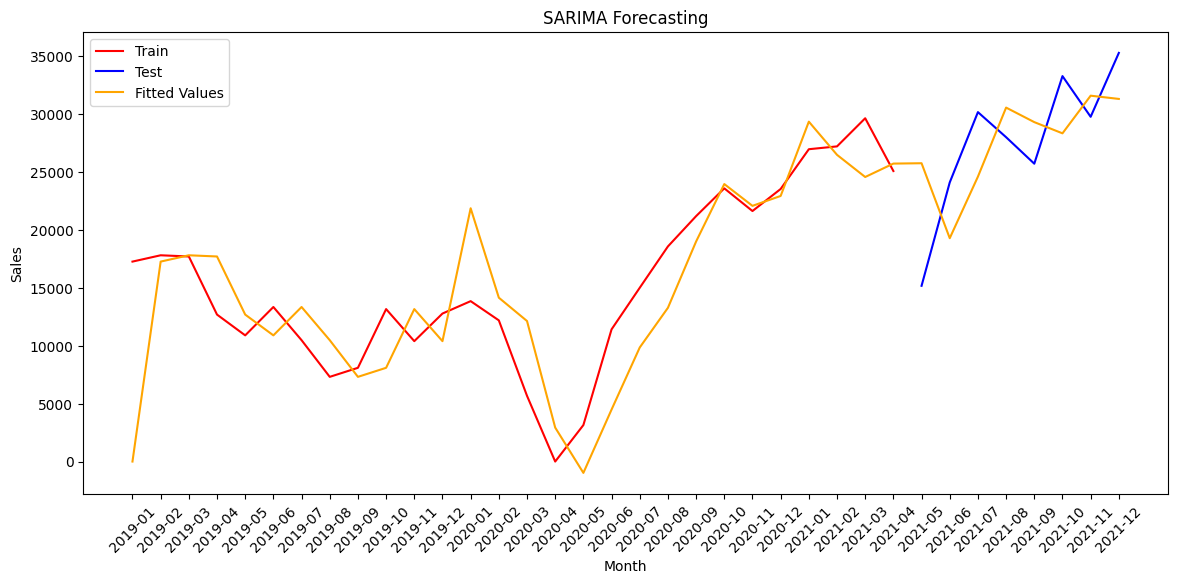

In [72]:
# Example: Visualize results
plt.figure(figsize=(14, 6))
plt.plot(train0_T.index, train0_T, label='Train', color='red')
plt.plot(test0_T.index, test0_T, label='Test',color='blue')
plt.plot(S_fitted_model_T.fittedvalues, color='orange', label='Fitted Values')
plt.title('SARIMA Forecasting')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks( rotation=45)
plt.legend()
plt.show()


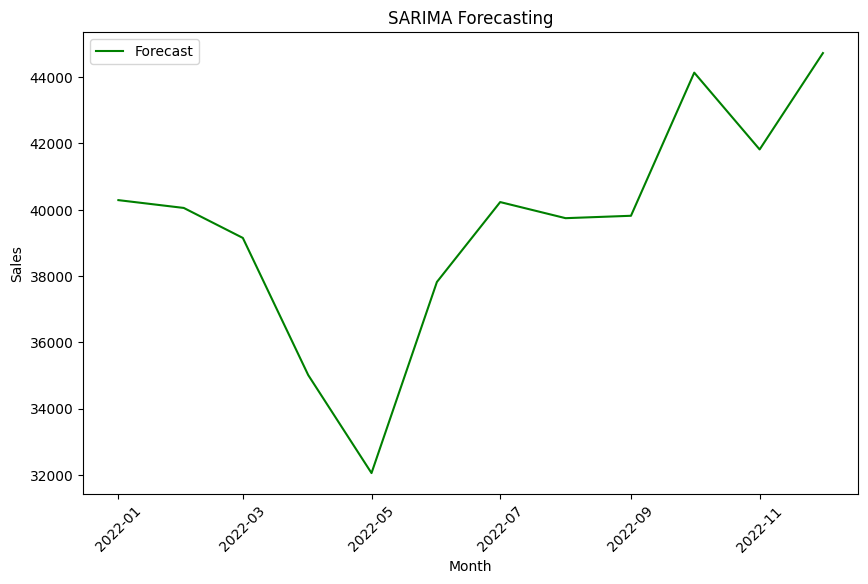

In [73]:
plt.figure(figsize=(10, 6))
plt.plot(S_forecast_T, color='green', label='Forecast')
plt.title('SARIMA Forecasting')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks( rotation=45)
plt.legend()
plt.show()

In [74]:
S_forecast_values_T = S_fitted_model_T.forecast(steps=len(test0_T))

# Calculate Mean Absolute Error (MAE)
mae_3_T = mean_absolute_error(test0_T, S_forecast_values_T)
print(f"Mean Absolute Error (MAE): {mae_3_T}")

# Calculate Mean Squared Error (MSE)
mse_3_T = mean_squared_error(test0_T, S_forecast_values_T)
print(f"Mean Squared Error (MSE): {mse_3_T}")

rmse_3_T = np.sqrt(mse_3_T)
print(f"Root Mean Squared Error (RMSE): {rmse_3_T}")

Mean Absolute Error (MAE): 10345.85479458464
Mean Squared Error (MSE): 150442704.75555316
Root Mean Squared Error (RMSE): 12265.508744261411


In [76]:
sar_rmse_per_T=(rmse_3_T/35300)*100
sar_rmse_per_T

34.746483694791536

### Maruti 

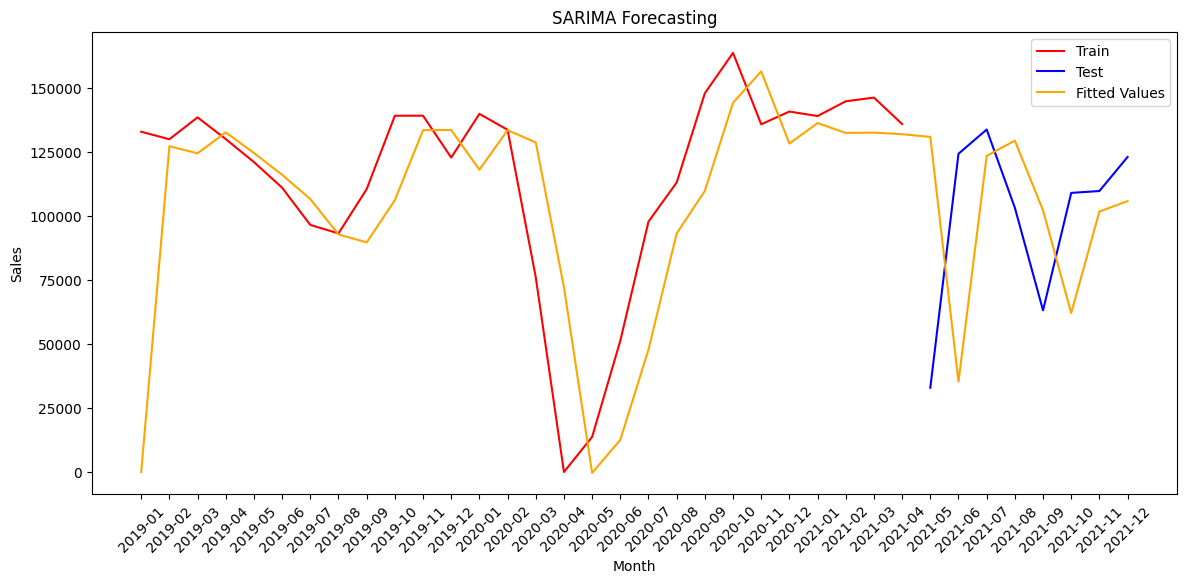

In [77]:
plt.figure(figsize=(14, 6))
plt.plot(train0_MS.index, train0_MS, label='Train', color='red')
plt.plot(test0_MS.index, test0_MS, label='Test',color='blue')
plt.plot(S_fitted_model_MS.fittedvalues, color='orange', label='Fitted Values')
plt.title('SARIMA Forecasting')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks( rotation=45)
plt.legend()
plt.show()

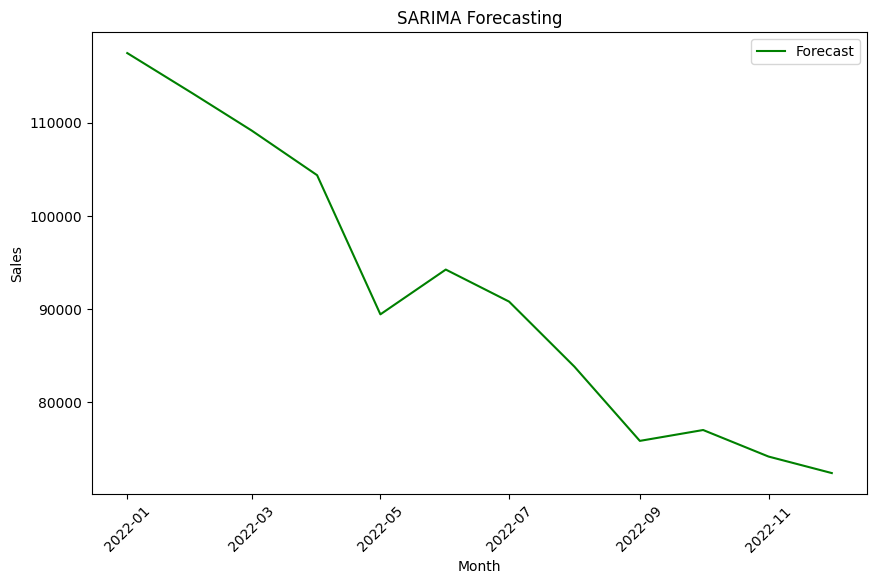

In [78]:
plt.figure(figsize=(10, 6))
plt.plot(S_forecast_MS, color='green', label='Forecast')
plt.title('SARIMA Forecasting')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks( rotation=45)
plt.legend()
plt.show()

In [79]:
S_forecast_values_MS = S_fitted_model_MS.forecast(steps=len(test0_MS))

# Calculate Mean Absolute Error (MAE)
mae_3_MS = mean_absolute_error(test0_MS, S_forecast_values_MS)
print(f"Mean Absolute Error (MAE): {mae_3_MS}")

# Calculate Mean Squared Error (MSE)
mse_3_MS = mean_squared_error(test0_MS, S_forecast_values_MS)
print(f"Mean Squared Error (MSE): {mse_3_MS}")

rmse_3_MS = np.sqrt(mse_3_MS)
print(f"Root Mean Squared Error (RMSE): {rmse_3_MS}")

Mean Absolute Error (MAE): 27583.94655828863
Mean Squared Error (MSE): 1335515962.6234014
Root Mean Squared Error (RMSE): 36544.71182843561


In [80]:
sar_rmse_per_MS=(rmse_3_MS/163656)*100
sar_rmse_per_MS

22.33019982673144

### Mahindra

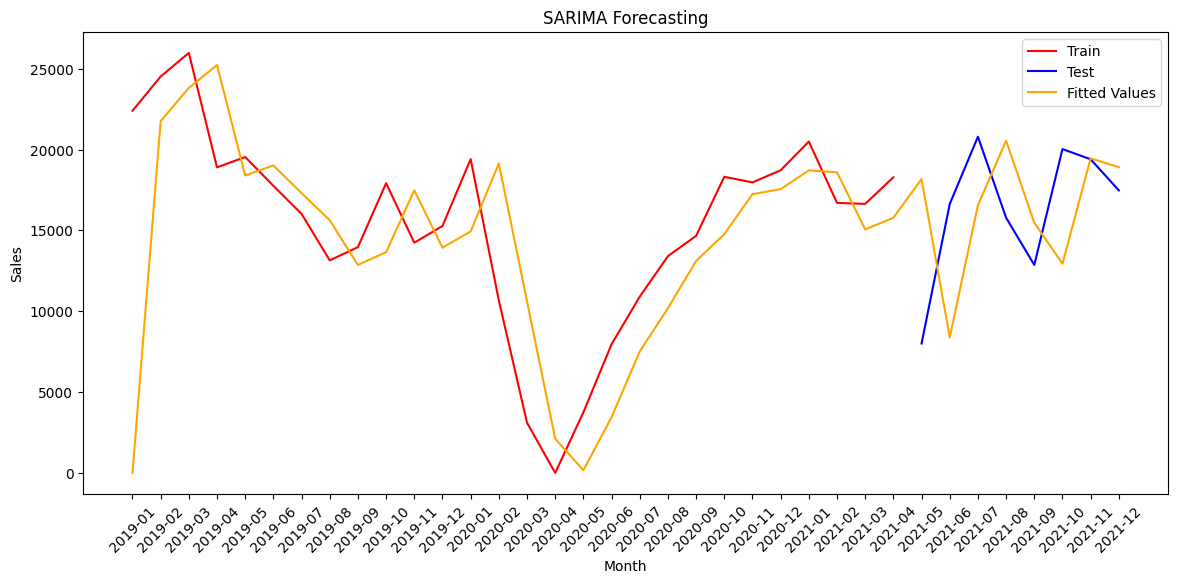

In [81]:
plt.figure(figsize=(14, 6))
plt.plot(train0_M.index, train0_M, label='Train', color='red')
plt.plot(test0_M.index, test0_M, label='Test',color='blue')
plt.plot(S_fitted_model_M.fittedvalues, color='orange', label='Fitted Values')
plt.title('SARIMA Forecasting')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks( rotation=45)
plt.legend()
plt.show()

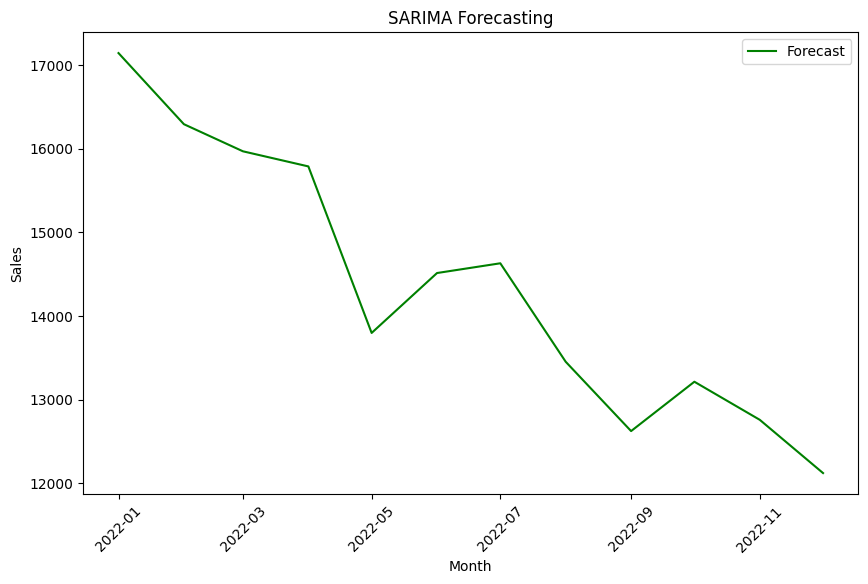

In [82]:
plt.figure(figsize=(10, 6))
plt.plot(S_forecast_M, color='green', label='Forecast')
plt.title('SARIMA Forecasting')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks( rotation=45)
plt.legend()
plt.show()

In [83]:
S_forecast_values_M = S_fitted_model_M.forecast(steps=len(test0_M))

# Calculate Mean Absolute Error (MAE)
mae_3_M = mean_absolute_error(test0_M, S_forecast_values_M)
print(f"Mean Absolute Error (MAE): {mae_3_M}")

# Calculate Mean Squared Error (MSE)
mse_3_M = mean_squared_error(test0_M, S_forecast_values_M)
print(f"Mean Squared Error (MSE): {mse_3_M}")

rmse_3_M = np.sqrt(mse_3_M)
print(f"Root Mean Squared Error (RMSE): {rmse_3_M}")

Mean Absolute Error (MAE): 3695.18347667962
Mean Squared Error (MSE): 22153911.560289506
Root Mean Squared Error (RMSE): 4706.79419140985


In [84]:
sar_rmse_per_M=(rmse_3_M/25982)*100
sar_rmse_per_M

18.115596148910207

## GRAPH REPRESENTATION

### Maruti Suzuki

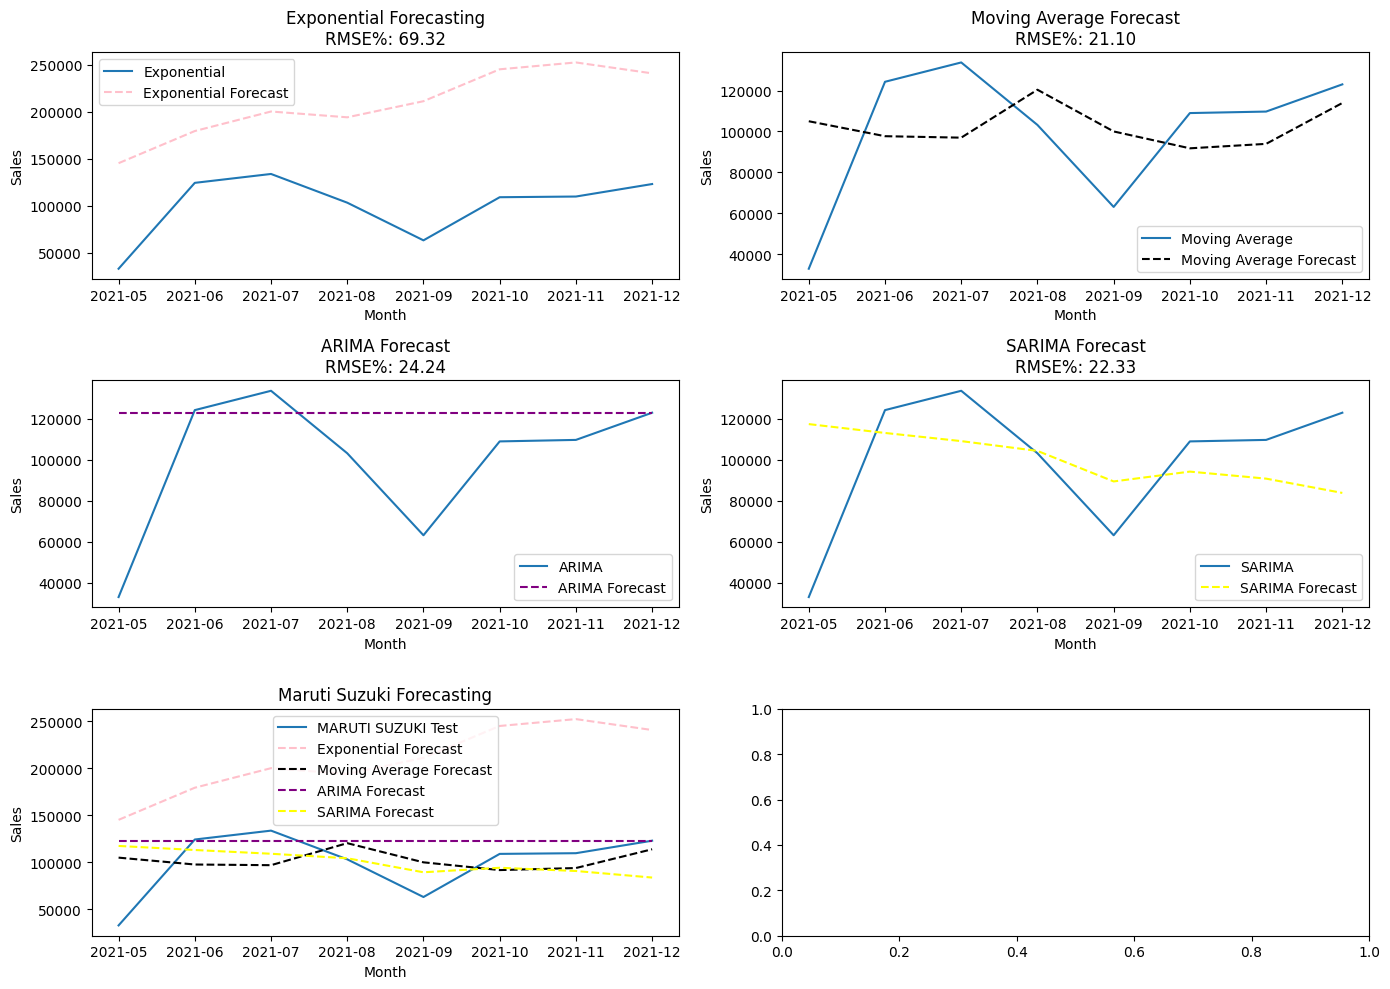

In [86]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))

# Plot for Exponential
axes[0, 0].plot(test0_MS.index, test0_MS, label='Exponential')
axes[0, 0].plot(test0_MS.index, forecast_values_MS, label='Exponential Forecast', linestyle='--', color='pink')
axes[0, 0].set_title('Exponential Forecasting\nRMSE%: {:.2f}'.format(es_rmse_per_MS))
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Sales')
axes[0, 0].legend()

# Plot for Moving
axes[0, 1].plot(test0_MS.index, test0_MS, label='Moving Average')
axes[0, 1].plot(test0_MS.index, forecast_values_sma_MS, label='Moving Average Forecast', linestyle='--', color='black')
axes[0, 1].set_title('Moving Average Forecast\nRMSE%: {:.2f}'.format(ma_rmse_per_MS))
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Sales')
axes[0, 1].legend()

# Plot for Simple
axes[1, 0].plot(test0_MS.index, test0_MS, label='ARIMA')
axes[1, 0].plot(test0_MS.index, A_forecast_values_MS, label='ARIMA Forecast', linestyle='--', color='purple')
axes[1, 0].set_title('ARIMA Forecast\nRMSE%: {:.2f}'.format(ar_rmse_per_MS))
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Sales')
axes[1, 0].legend()

# Plot for Simple
axes[1, 1].plot(test0_MS.index, test0_MS, label='SARIMA')
axes[1, 1].plot(test0_MS.index, S_forecast_values_MS, label='SARIMA Forecast', linestyle='--', color='yellow')
axes[1, 1].set_title('SARIMA Forecast\nRMSE%: {:.2f}'.format(sar_rmse_per_MS))
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Sales')
axes[1, 1].legend()

# Plot for Pant
axes[2, 0].plot(test0_MS.index, test0_MS, label='MARUTI SUZUKI Test')
axes[2, 0].plot(test0_MS.index, forecast_values_MS, label='Exponential Forecast', linestyle='--', color='pink')
axes[2, 0].plot(test0_MS.index, forecast_values_sma_MS, label='Moving Average Forecast', linestyle='--', color='black')
axes[2, 0].plot(test0_MS.index, A_forecast_values_MS, label='ARIMA Forecast', linestyle='--', color='purple')
axes[2, 0].plot(test0_MS.index, S_forecast_values_MS, label='SARIMA Forecast', linestyle='--', color='yellow')
axes[2, 0].set_title('Maruti Suzuki Forecasting')
axes[2, 0].set_xlabel('Month')
axes[2, 0].set_ylabel('Sales')
axes[2, 0].legend()

# Adjust layout
plt.tight_layout()
plt.show()

### Mahindra

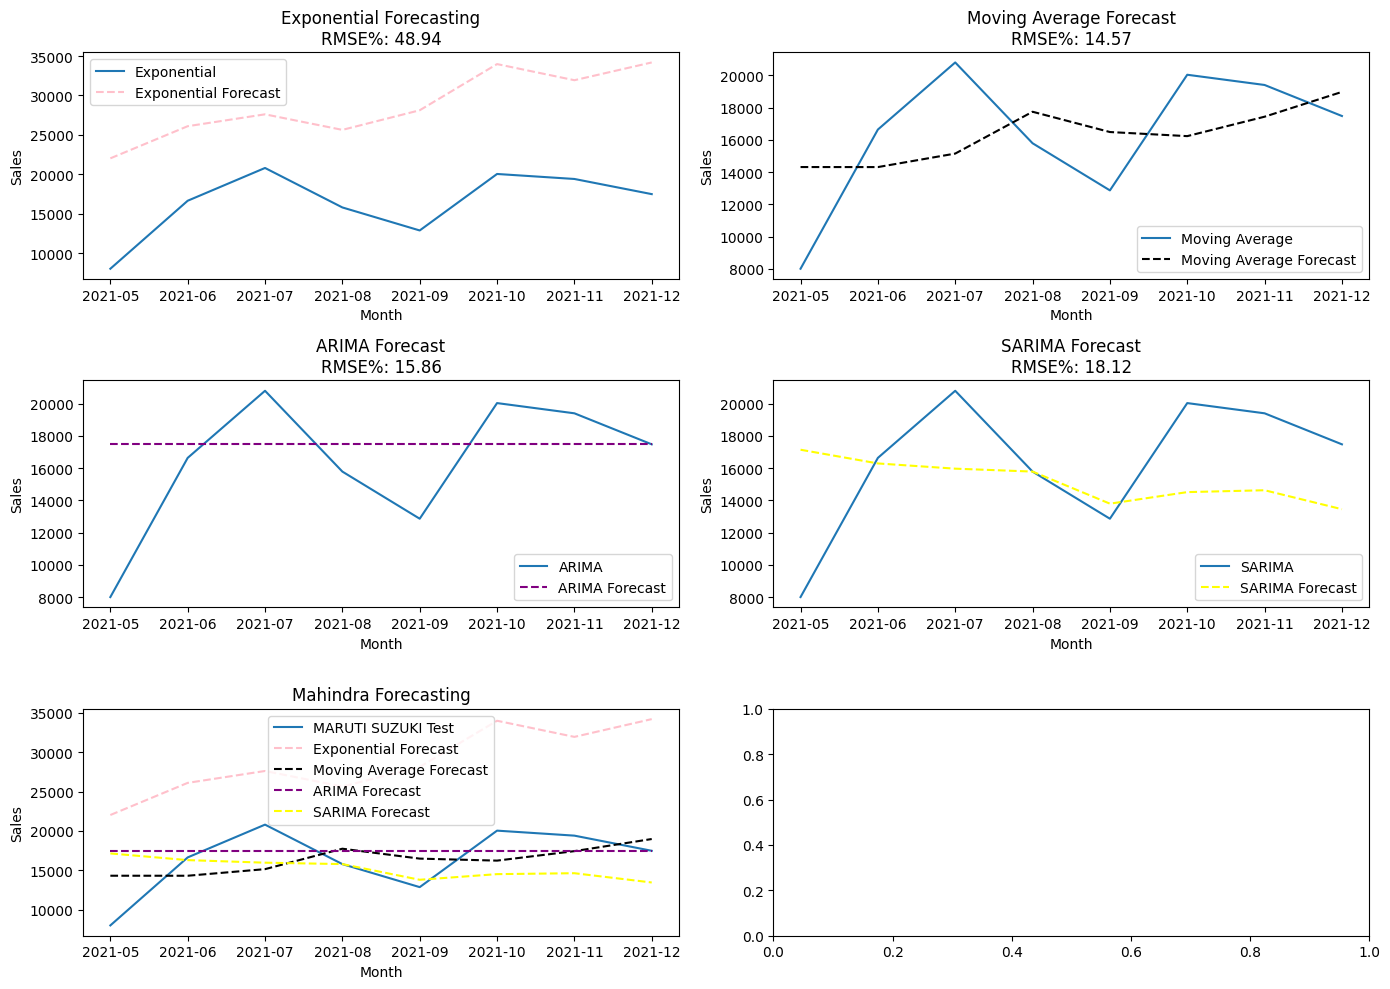

In [87]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))

# Plot for Exponential
axes[0, 0].plot(test0_M.index, test0_M, label='Exponential')
axes[0, 0].plot(test0_M.index, forecast_values_M, label='Exponential Forecast', linestyle='--', color='pink')
axes[0, 0].set_title('Exponential Forecasting\nRMSE%: {:.2f}'.format(es_rmse_per_M))
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Sales')
axes[0, 0].legend()

# Plot for Moving
axes[0, 1].plot(test0_M.index, test0_M, label='Moving Average')
axes[0, 1].plot(test0_M.index, forecast_values_sma_M, label='Moving Average Forecast', linestyle='--', color='black')
axes[0, 1].set_title('Moving Average Forecast\nRMSE%: {:.2f}'.format(ma_rmse_per_M))
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Sales')
axes[0, 1].legend()

# Plot for Simple
axes[1, 0].plot(test0_M.index, test0_M, label='ARIMA')
axes[1, 0].plot(test0_M.index, A_forecast_values_M, label='ARIMA Forecast', linestyle='--', color='purple')
axes[1, 0].set_title('ARIMA Forecast\nRMSE%: {:.2f}'.format(ar_rmse_per_M))
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Sales')
axes[1, 0].legend()

# Plot for Simple
axes[1, 1].plot(test0_M.index, test0_M, label='SARIMA')
axes[1, 1].plot(test0_M.index, S_forecast_values_M, label='SARIMA Forecast', linestyle='--', color='yellow')
axes[1, 1].set_title('SARIMA Forecast\nRMSE%: {:.2f}'.format(sar_rmse_per_M))
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Sales')
axes[1, 1].legend()

# Plot for Pant
axes[2, 0].plot(test0_M.index, test0_M, label='MARUTI SUZUKI Test')
axes[2, 0].plot(test0_M.index, forecast_values_M, label='Exponential Forecast', linestyle='--', color='pink')
axes[2, 0].plot(test0_M.index, forecast_values_sma_M, label='Moving Average Forecast', linestyle='--', color='black')
axes[2, 0].plot(test0_M.index, A_forecast_values_M, label='ARIMA Forecast', linestyle='--', color='purple')
axes[2, 0].plot(test0_M.index, S_forecast_values_M, label='SARIMA Forecast', linestyle='--', color='yellow')
axes[2, 0].set_title('Mahindra Forecasting')
axes[2, 0].set_xlabel('Month')
axes[2, 0].set_ylabel('Sales')
axes[2, 0].legend()

# Adjust layout
plt.tight_layout()
plt.show()

### Tata

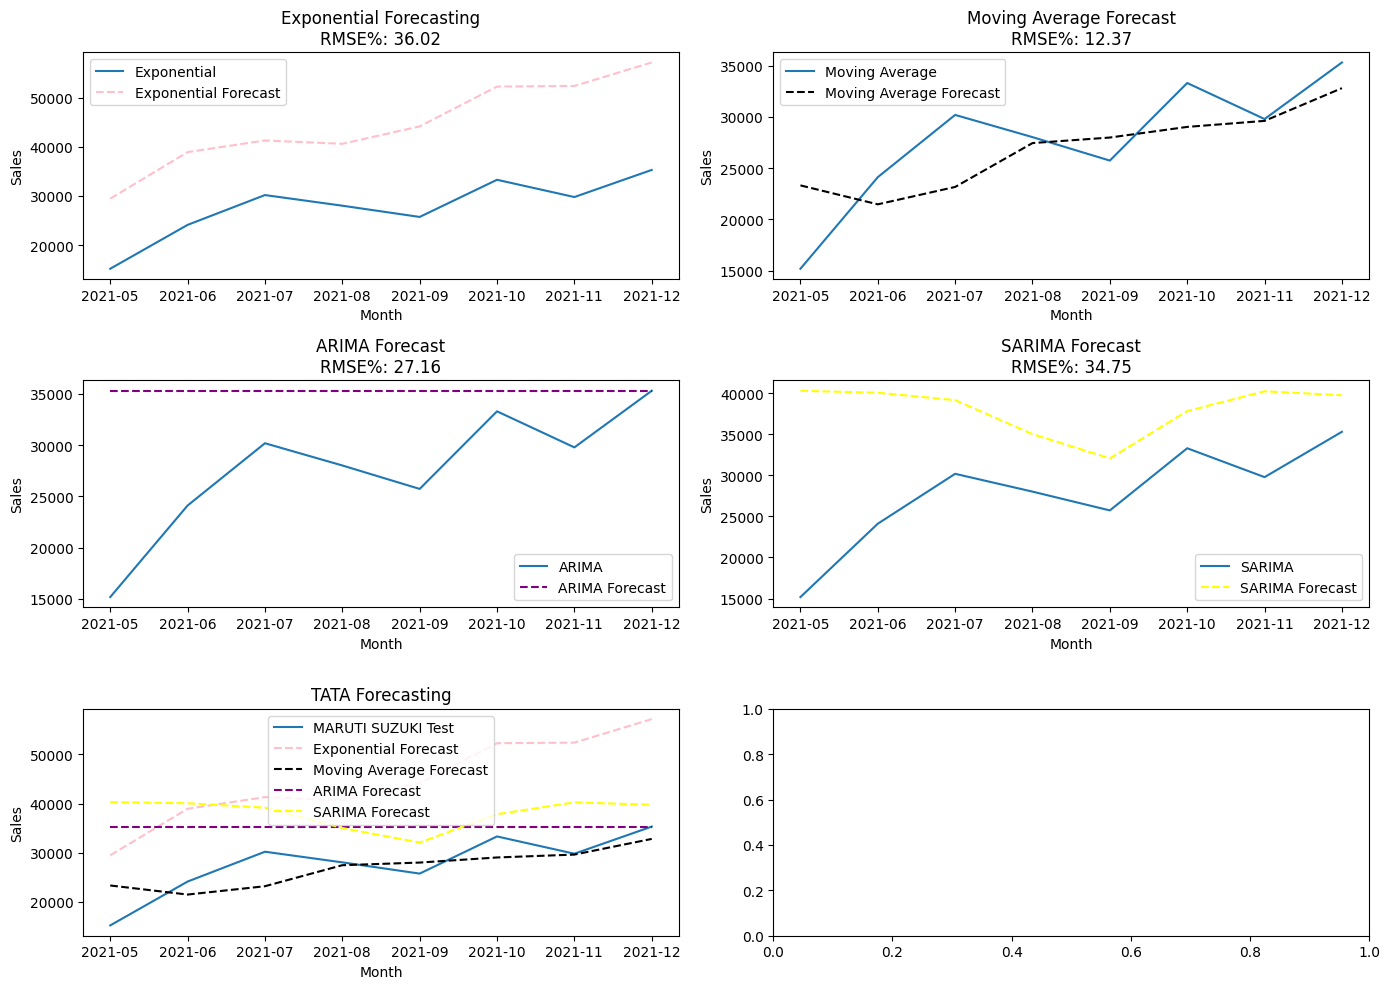

In [88]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))

# Plot for Exponential
axes[0, 0].plot(test0_T.index, test0_T, label='Exponential')
axes[0, 0].plot(test0_T.index, forecast_values_T, label='Exponential Forecast', linestyle='--', color='pink')
axes[0, 0].set_title('Exponential Forecasting\nRMSE%: {:.2f}'.format(es_rmse_per_T))
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Sales')
axes[0, 0].legend()

# Plot for Moving
axes[0, 1].plot(test0_T.index, test0_T, label='Moving Average')
axes[0, 1].plot(test0_T.index, forecast_values_sma_T, label='Moving Average Forecast', linestyle='--', color='black')
axes[0, 1].set_title('Moving Average Forecast\nRMSE%: {:.2f}'.format(ma_rmse_per_T))
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Sales')
axes[0, 1].legend()

# Plot for Simple
axes[1, 0].plot(test0_T.index, test0_T, label='ARIMA')
axes[1, 0].plot(test0_T.index, A_forecast_values_T, label='ARIMA Forecast', linestyle='--', color='purple')
axes[1, 0].set_title('ARIMA Forecast\nRMSE%: {:.2f}'.format(ar_rmse_per_T))
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Sales')
axes[1, 0].legend()

# Plot for Simple
axes[1, 1].plot(test0_T.index, test0_T, label='SARIMA')
axes[1, 1].plot(test0_T.index, S_forecast_values_T, label='SARIMA Forecast', linestyle='--', color='yellow')
axes[1, 1].set_title('SARIMA Forecast\nRMSE%: {:.2f}'.format(sar_rmse_per_T))
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Sales')
axes[1, 1].legend()

# Plot for Pant
axes[2, 0].plot(test0_T.index, test0_T, label='MARUTI SUZUKI Test')
axes[2, 0].plot(test0_T.index, forecast_values_T, label='Exponential Forecast', linestyle='--', color='pink')
axes[2, 0].plot(test0_T.index, forecast_values_sma_T, label='Moving Average Forecast', linestyle='--', color='black')
axes[2, 0].plot(test0_T.index, A_forecast_values_T, label='ARIMA Forecast', linestyle='--', color='purple')
axes[2, 0].plot(test0_T.index, S_forecast_values_T, label='SARIMA Forecast', linestyle='--', color='yellow')
axes[2, 0].set_title('TATA Forecasting')
axes[2, 0].set_xlabel('Month')
axes[2, 0].set_ylabel('Sales')
axes[2, 0].legend()

# Adjust layout
plt.tight_layout()
plt.show()

# Foreign car sales

### Intro

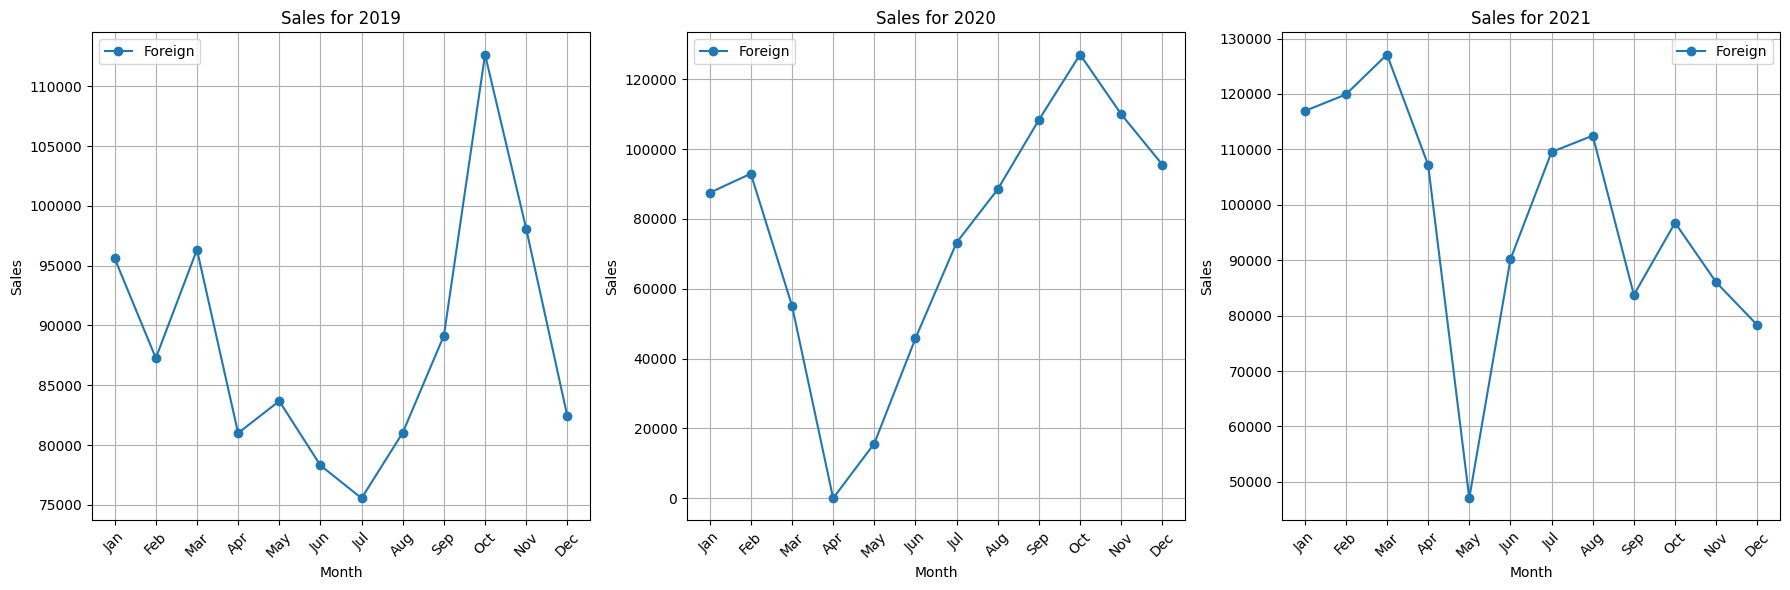

In [6]:
# Plot for each year
years=[2019,2020,2021]
plt.figure(figsize=(18, 6))
for i, year in enumerate(years, 1):
    plt.subplot(1, 3, i)
    plt.plot(df_non_indian[df_non_indian['Year'] == year].iloc[:, 3:15].sum(axis=0), label='Foreign', marker='o')
    plt.xlabel('Month')
    plt.ylabel('Sales')
    plt.title(f'Sales for {year}')
    plt.xticks(range(12), df.columns[3:15], rotation=45)
    plt.legend()
    plt.grid(True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [37]:
df2 = pd.read_csv("df_forecast_nonindian.csv")

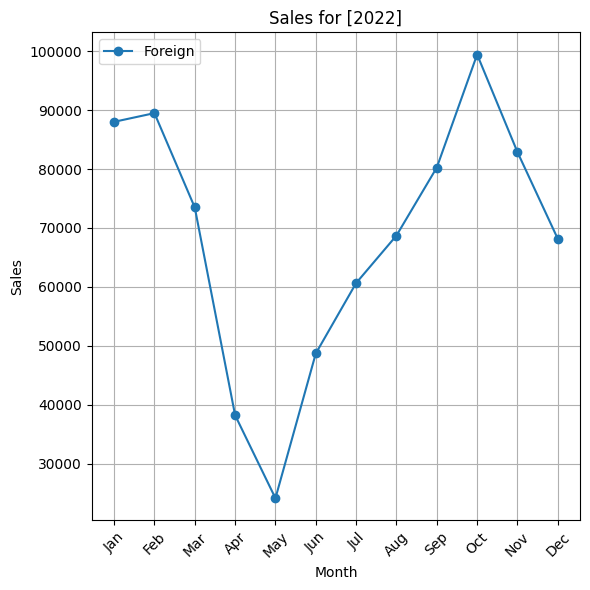

In [42]:
years=[2022]
plt.figure(figsize=(6, 6))
#plt.subplot(1, 3, i)
plt.plot(df2[df2['Year'] == 2022].iloc[:, 3:15].sum(axis=0), label='Foreign', marker='o')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title(f'Sales for {years}')
plt.xticks(range(12), df.columns[3:15], rotation=45)
plt.legend()
plt.grid(True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [7]:
DF_non_indian  = pd.read_csv("Non_Indian_cars.csv")
DF_non_indian=DF_non_indian.set_index('Index')
DF_non_indian.head()

Hyundai  Kia  Honda  Toyota  Renault  Ford  Nissan  MG  Volkswagen  \
Index                                                                         
2019-01    45803    0  18259   11221     5825  7700    1500   0        2803   
2019-02    43110    0  13527   11760     6241  6669     774   0        2617   
2019-03    44350    0  17201   12818     7127  8271     977   0        2751   
2019-04    42005    0  11272   10112     6256  6515     518   0        1995   
2019-05    42502    0  11442   12138     5949  6361     476   0        2685   

         Skoda  Jeep  
Index                 
2019-01   1232  1267  
2019-02   1267  1304  
2019-03   1401  1441  
2019-04   1126  1204  
2019-05   1148   977

In [20]:
Hyundai = DF_non_indian['Hyundai']
Kia = DF_non_indian['Kia']
Honda = DF_non_indian['Honda']
Toyota = DF_non_indian['Toyota']
Renault = DF_non_indian['Renault']
Ford = DF_non_indian['Ford']
Nissan = DF_non_indian['Nissan']
MG = DF_non_indian['MG']
Volkswagen = DF_non_indian['Volkswagen']
Skoda = DF_non_indian['Skoda']
Jeep = DF_non_indian['Jeep']

### Graph Representation

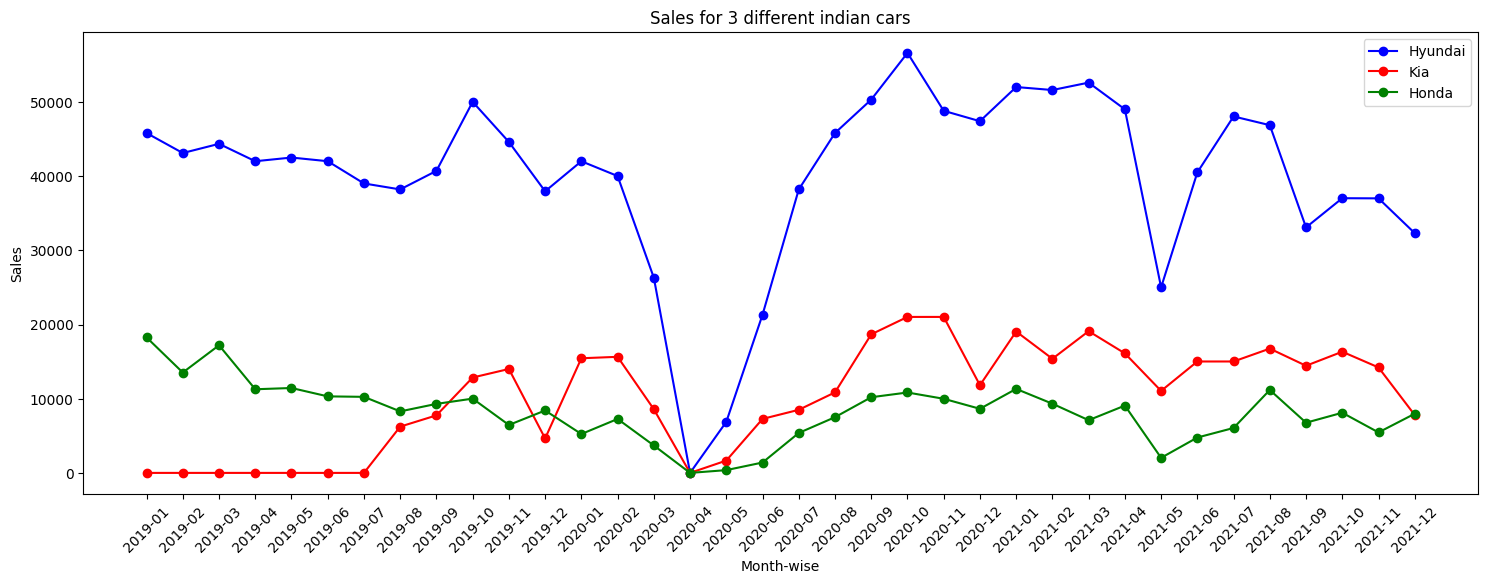

In [92]:
plt.figure(figsize=(18, 6))
plt.plot(DF_non_indian.index, DF_non_indian['Hyundai'], label='Hyundai', marker='o', color='blue')
plt.plot(DF_non_indian.index, DF_non_indian['Kia'], label='Kia', marker='o', color='red')
plt.plot(DF_non_indian.index, DF_non_indian['Honda'], label='Honda', marker='o', color='green')
plt.xticks( rotation=45)
plt.xlabel('Month-wise')
plt.ylabel('Sales')
plt.title(f'Sales for 3 different indian cars')
plt.legend()
plt.show()

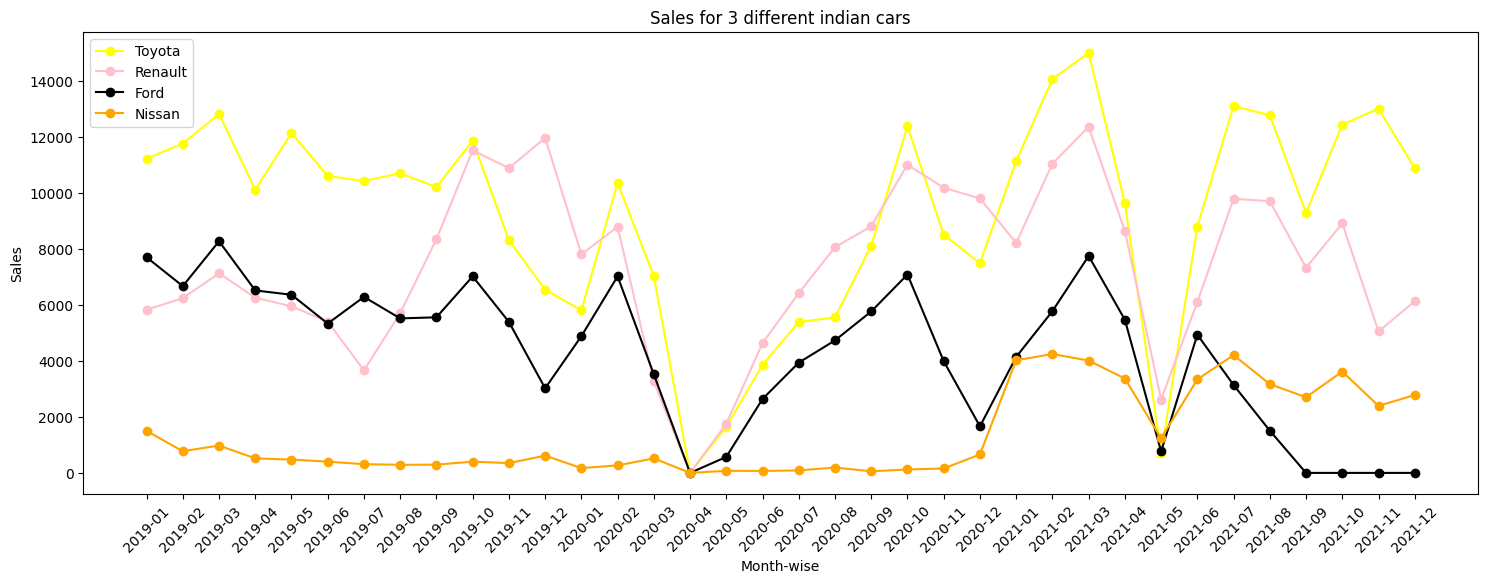

In [93]:
plt.figure(figsize=(18, 6))
plt.plot(DF_non_indian.index, DF_non_indian['Toyota'], label='Toyota', marker='o', color='yellow')
plt.plot(DF_non_indian.index, DF_non_indian['Renault'], label='Renault', marker='o', color='pink')
plt.plot(DF_non_indian.index, DF_non_indian['Ford'], label='Ford', marker='o', color='black')
plt.plot(DF_non_indian.index, DF_non_indian['Nissan'], label='Nissan', marker='o', color='orange')
plt.xticks( rotation=45)
plt.xlabel('Month-wise')
plt.ylabel('Sales')
plt.title(f'Sales for 3 different indian cars')
plt.legend()
plt.show()

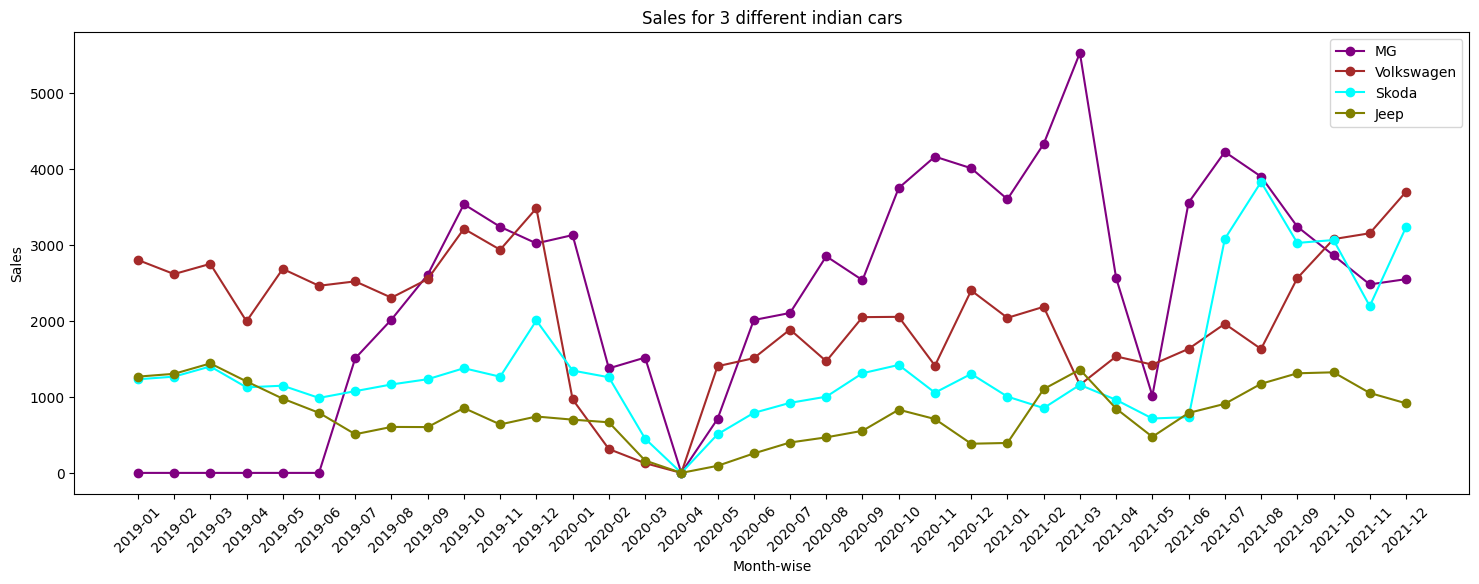

In [94]:
plt.figure(figsize=(18, 6))
plt.plot(DF_non_indian.index, DF_non_indian['MG'], label='MG', marker='o', color='purple')
plt.plot(DF_non_indian.index, DF_non_indian['Volkswagen'], label='Volkswagen', marker='o', color='brown')
plt.plot(DF_non_indian.index, DF_non_indian['Skoda'], label='Skoda', marker='o', color='cyan')
plt.plot(DF_non_indian.index, DF_non_indian['Jeep'], label='Jeep', marker='o', color='olive')
plt.xticks( rotation=45)
plt.xlabel('Month-wise')
plt.ylabel('Sales')
plt.title(f'Sales for 3 different indian cars')
plt.legend()
plt.show()


### Seasonal Decompose

In [95]:
Foreign_car_result1 = seasonal_decompose(Hyundai, model='additive', period=12)
Foreign_car_result2 = seasonal_decompose(Kia, model='additive', period=12)
Foreign_car_result3 = seasonal_decompose(Honda, model='additive', period=12)
Foreign_car_result4 = seasonal_decompose(Toyota, model='additive', period=12)
Foreign_car_result5 = seasonal_decompose(Renault, model='additive', period=12)
Foreign_car_result6 = seasonal_decompose(Ford, model='additive', period=12)
Foreign_car_result7 = seasonal_decompose(Nissan, model='additive', period=12)
Foreign_car_result8 = seasonal_decompose(MG, model='additive', period=12)
Foreign_car_result9 = seasonal_decompose(Volkswagen, model='additive', period=12)
Foreign_car_result10 = seasonal_decompose(Skoda, model='additive', period=12)
Foreign_car_result11 = seasonal_decompose(Jeep, model='additive', period=12)

#### Trend

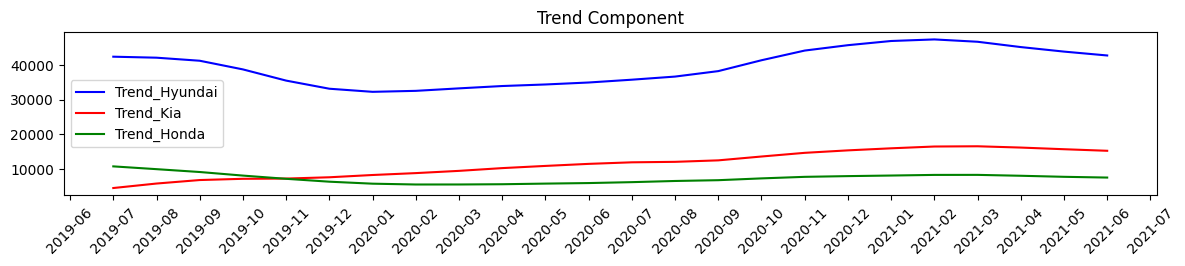

In [96]:

plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 2)
plt.plot(Foreign_car_result1.trend, label='Trend_Hyundai', color='blue')
plt.plot(Foreign_car_result2.trend, label='Trend_Kia', color='red')
plt.plot(Foreign_car_result3.trend, label='Trend_Honda', color='green')
plt.legend()
plt.title('Trend Component')
plt.tight_layout()
plt.xticks( rotation=45)
plt.show()

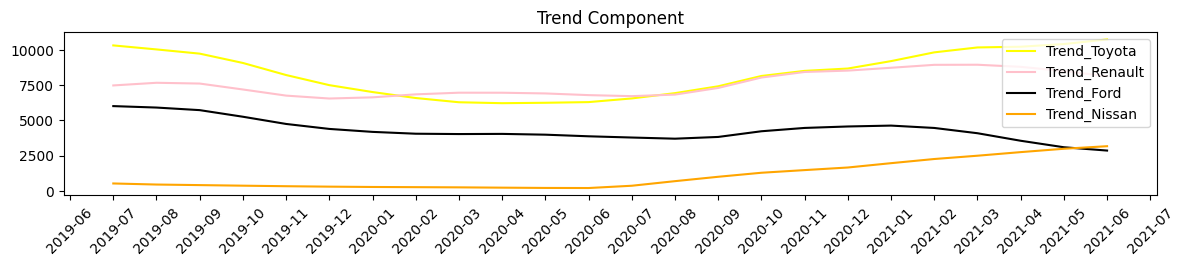

In [97]:
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 2)
plt.plot(Foreign_car_result4.trend, label='Trend_Toyota', color='yellow')
plt.plot(Foreign_car_result5.trend, label='Trend_Renault', color='pink')
plt.plot(Foreign_car_result6.trend, label='Trend_Ford', color='black')
plt.plot(Foreign_car_result7.trend, label='Trend_Nissan', color='orange')
plt.legend()
plt.title('Trend Component')
plt.tight_layout()
plt.xticks( rotation=45)
plt.show()

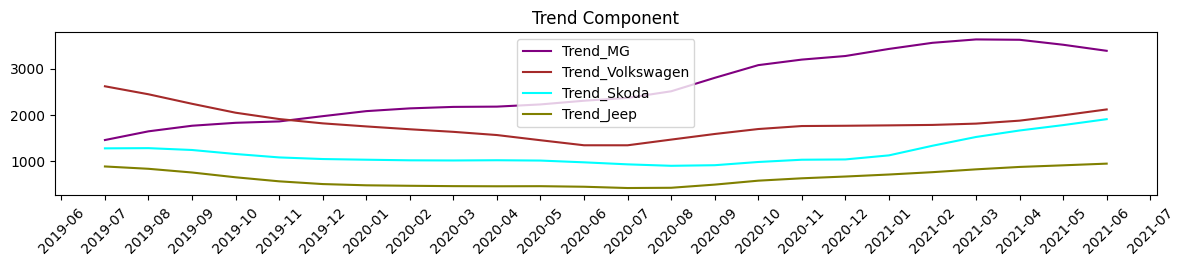

In [98]:
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 2)
plt.plot(Foreign_car_result8.trend, label='Trend_MG', color='purple')
plt.plot(Foreign_car_result9.trend, label='Trend_Volkswagen', color='brown')
plt.plot(Foreign_car_result10.trend, label='Trend_Skoda', color='cyan')
plt.plot(Foreign_car_result11.trend, label='Trend_Jeep', color='olive')
plt.legend()
plt.title('Trend Component')
plt.tight_layout()
plt.xticks( rotation=45)
plt.show()

#### Seasonality

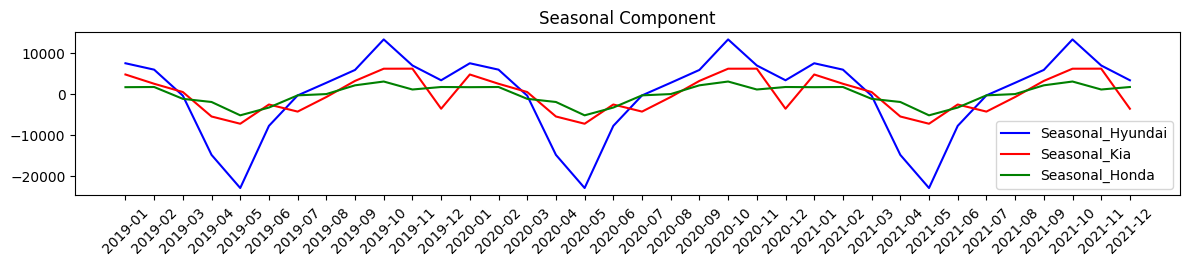

In [99]:
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 3)
plt.plot(Foreign_car_result1.seasonal, label='Seasonal_Hyundai', color='blue')
plt.plot(Foreign_car_result2.seasonal, label='Seasonal_Kia', color='red')
plt.plot(Foreign_car_result3.seasonal, label='Seasonal_Honda', color='green')
plt.legend()
plt.title('Seasonal Component')
plt.tight_layout()
plt.xticks( rotation=45)
plt.show()

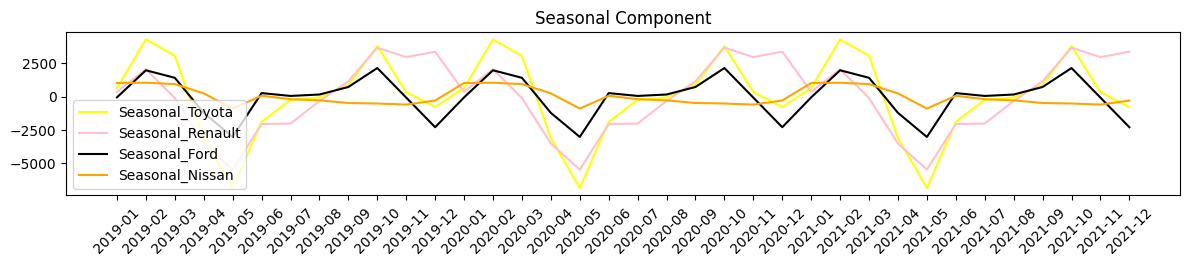

In [100]:
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 3)
plt.plot(Foreign_car_result4.seasonal, label='Seasonal_Toyota', color='yellow')
plt.plot(Foreign_car_result5.seasonal, label='Seasonal_Renault', color='pink')
plt.plot(Foreign_car_result6.seasonal, label='Seasonal_Ford', color='black')
plt.plot(Foreign_car_result7.seasonal, label='Seasonal_Nissan', color='orange')
plt.legend()
plt.title('Seasonal Component')
plt.tight_layout()
plt.xticks( rotation=45)
plt.show()

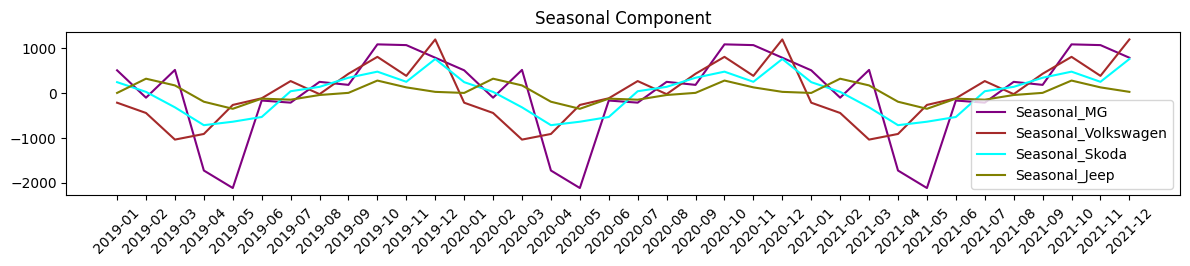

In [101]:
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 3)
plt.plot(Foreign_car_result8.seasonal, label='Seasonal_MG', color='purple')
plt.plot(Foreign_car_result9.seasonal, label='Seasonal_Volkswagen', color='brown')
plt.plot(Foreign_car_result10.seasonal, label='Seasonal_Skoda', color='cyan')
plt.plot(Foreign_car_result11.seasonal, label='Seasonal_Jeep', color='olive')
plt.legend()
plt.title('Seasonal Component')
plt.tight_layout()
plt.xticks( rotation=45)
plt.show()

#### Residual

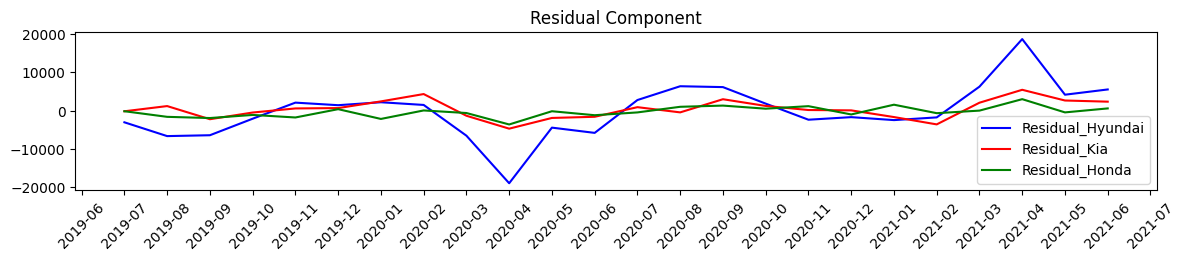

In [102]:
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 4)
plt.plot(Foreign_car_result1.resid, label='Residual_Hyundai', color='blue')
plt.plot(Foreign_car_result2.resid, label='Residual_Kia', color='red')
plt.plot(Foreign_car_result3.resid, label='Residual_Honda', color='green')
plt.legend()
plt.title('Residual Component')
plt.tight_layout()
plt.xticks( rotation=45)
plt.show()

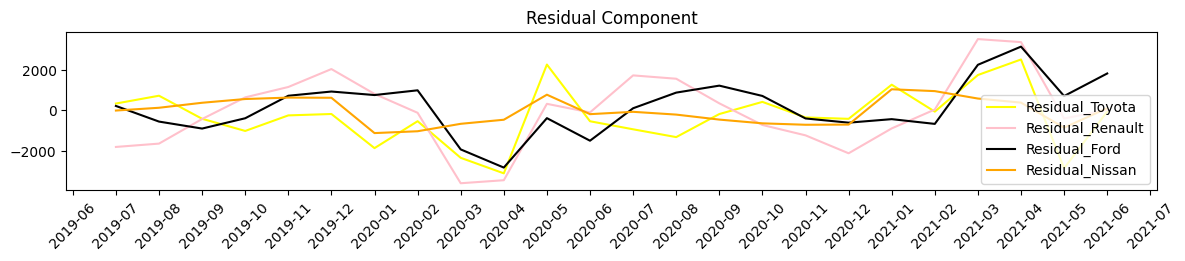

In [103]:
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 4)
plt.plot(Foreign_car_result4.resid, label='Residual_Toyota', color='yellow')
plt.plot(Foreign_car_result5.resid, label='Residual_Renault', color='pink')
plt.plot(Foreign_car_result6.resid, label='Residual_Ford', color='black')
plt.plot(Foreign_car_result7.resid, label='Residual_Nissan', color='orange')
plt.legend()
plt.title('Residual Component')
plt.tight_layout()
plt.xticks( rotation=45)
plt.show()

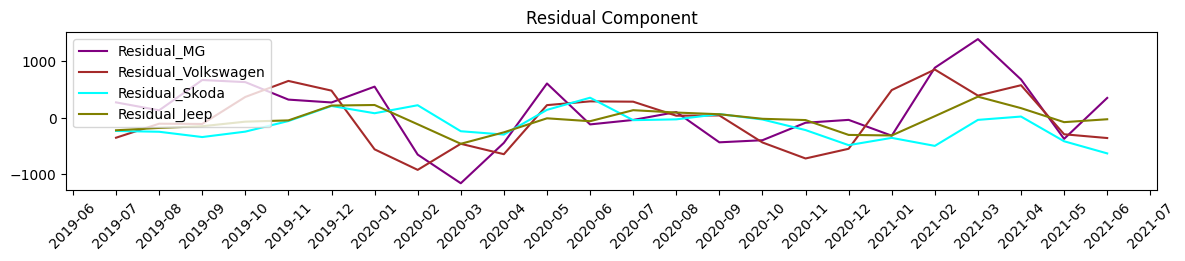

In [104]:
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 4)
plt.plot(Foreign_car_result8.resid, label='Residual_MG', color='purple')
plt.plot(Foreign_car_result9.resid, label='Residual_Volkswagen', color='brown')
plt.plot(Foreign_car_result10.resid, label='Residual_Skoda', color='cyan')
plt.plot(Foreign_car_result11.resid, label='Residual_Jeep', color='olive')
plt.legend()
plt.title('Residual Component')
plt.tight_layout()
plt.xticks( rotation=45)
plt.show()

# Forecasting for Non Indian Car Company

## Hyundai Car

In [10]:
train_size_Hyundai = int(len(Hyundai) * 0.8)  # Use 80% of the data for training
train, test = Hyundai[:train_size_Hyundai], Hyundai[train_size_Hyundai:]


#### Exponential Smoothing

In [21]:
model_Hyundai = ExponentialSmoothing(Hyundai, seasonal='add', seasonal_periods=12, trend='add', damped_trend=True)
fit_model_Hyundai = model_Hyundai.fit()

model_Kia = ExponentialSmoothing(Kia, seasonal='add', seasonal_periods=12, trend='add', damped_trend=True)
fit_model_Kia = model_Kia.fit()

model_Honda = ExponentialSmoothing(Honda, seasonal='add', seasonal_periods=12, trend='add', damped_trend=True)
fit_model_Honda = model_Honda.fit()

model_Toyota = ExponentialSmoothing(Toyota, seasonal='add', seasonal_periods=12, trend='add', damped_trend=True)
fit_model_Toyota = model_Toyota.fit()

model_Renault = ExponentialSmoothing(Renault, seasonal='add', seasonal_periods=12, trend='add', damped_trend=True)
fit_model_Renault = model_Renault.fit()

model_Ford = ExponentialSmoothing(Ford, seasonal='add', seasonal_periods=12, trend='add', damped_trend=True)
fit_model_Ford = model_Ford.fit()

model_Nissan = ExponentialSmoothing(Nissan, seasonal='add', seasonal_periods=12, trend='add', damped_trend=True)
fit_model_Nissan = model_Nissan.fit()

model_MG = ExponentialSmoothing(MG, seasonal='add', seasonal_periods=12, trend='add', damped_trend=True)
fit_model_MG = model_MG.fit()

model_Volkswagen = ExponentialSmoothing(Volkswagen, seasonal='add', seasonal_periods=12, trend='add', damped_trend=True)
fit_model_Volkswagen = model_Volkswagen.fit()

model_Skoda = ExponentialSmoothing(Skoda, seasonal='add', seasonal_periods=12, trend='add', damped_trend=True)
fit_model_Skoda = model_Skoda.fit()

model_Jeep = ExponentialSmoothing(Jeep, seasonal='add', seasonal_periods=12, trend='add', damped_trend=True)
fit_model_Jeep = model_Jeep.fit()


c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWar

In [25]:
forecast_values_Hyundai = fit_model_Hyundai.forecast(steps=18)
forecast_values_Kia = fit_model_Kia.forecast(steps=18)
forecast_values_Honda = fit_model_Honda.forecast(steps=18)
forecast_values_Toyota = fit_model_Toyota.forecast(steps=18)
forecast_values_Renault = fit_model_Renault.forecast(steps=18)
forecast_values_Ford = fit_model_Ford.forecast(steps=18)
forecast_values_Nissan = fit_model_Nissan.forecast(steps=18)
forecast_values_MG = fit_model_MG.forecast(steps=18)
forecast_values_Volkswagen = fit_model_Volkswagen.forecast(steps=18)
forecast_values_Skoda = fit_model_Skoda.forecast(steps=18)
forecast_values_Jeep = fit_model_Jeep.forecast(steps=18)

In [36]:
forecast_values_Renault

2022-01-01    3044.741577
2022-02-01    4676.766905
2022-03-01    2451.110582
2022-04-01   -1027.291257
2022-05-01   -3047.874316
2022-06-01     313.943360
2022-07-01     292.169943
2022-08-01    1923.065876
2022-09-01    3347.596343
2022-10-01    5816.033074
2022-11-01    5048.312827
2022-12-01    5396.355145
2023-01-01    2322.008424
2023-02-01    3961.261084
2023-03-01    1742.759819
2023-04-01   -1728.558512
2023-05-01   -3742.128898
2023-06-01    -373.368677
Freq: MS, dtype: float64

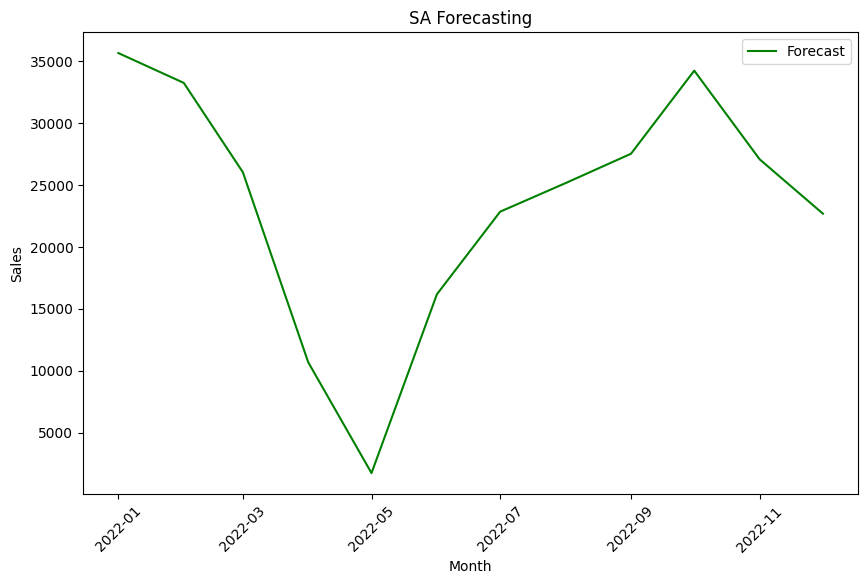

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(forecast_values_Hyundai, color='green', label='Forecast')
plt.title('SARIMA Forecasting')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks( rotation=45)
plt.legend()
plt.show()

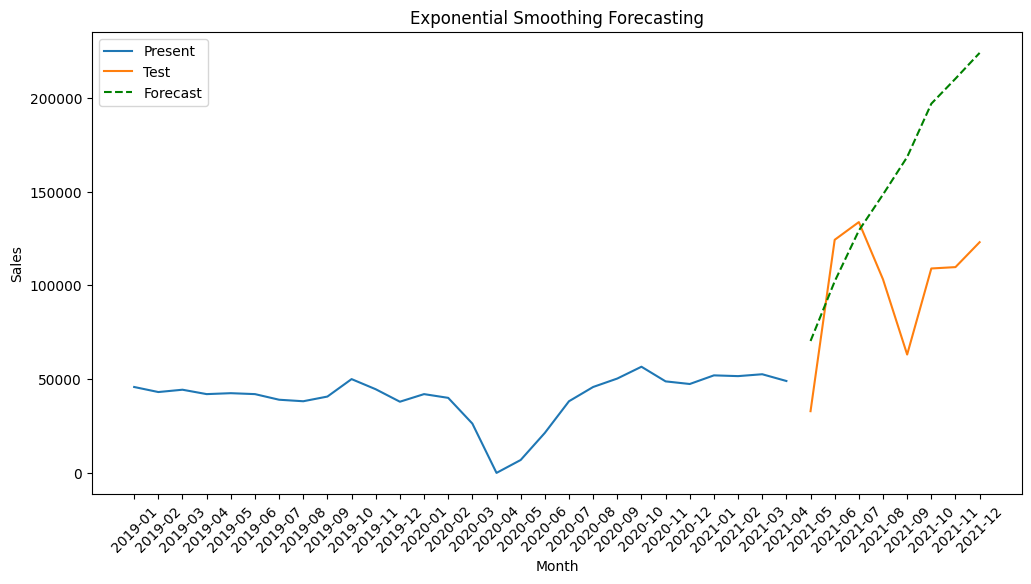

In [81]:
plt.figure(figsize=(12, 6))
plt.plot(train_Hyundai.index ,train_Hyundai, label='Present')
plt.plot(test_Hyundai.index, test_Hyundai, label='Test')
plt.plot(test_Hyundai.index ,forecast_values_Hyundai, label='Forecast', linestyle='--', color='green')
plt.title('Exponential Smoothing Forecasting')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks( rotation=45)
plt.legend()
plt.show()

In [95]:
forecast_values_Hyundai = fit_model_Hyundai.forecast(steps=44)
forecast_values_Hyundai
#d1=pd.DataFrame(forecast_values_Hyundai,forecast_values_Hyundai)
#d1


2021-05-01     70332.921104
2021-06-01    102110.141958
2021-07-01    129208.420182
2021-08-01    148434.695906
2021-09-01    168427.176020
2021-10-01    196843.333430
2021-11-01    210201.108702
2021-12-01    223936.353464
2022-01-01    243783.555567
2022-02-01    256350.627118
2022-03-01    257289.969812
2022-04-01    250319.159700
2022-05-01    268323.306783
2022-06-01    296812.461332
2022-07-01    320677.278832
2022-08-01    336723.792567
2022-09-01    353589.317641
2022-10-01    378930.449985
2022-11-01    389264.267753
2022-12-01    400025.774483
2023-01-01    416948.624023
2023-02-01    426639.908324
2023-03-01    424751.222547
2023-04-01    414999.349604
2023-05-01    430268.619527
2023-06-01    456068.315575
2023-07-01    477288.338953
2023-08-01    490733.981197
2023-09-01    505041.827976
2023-10-01    527867.757906
2023-11-01    535728.143734
2023-12-01    544057.295308
2024-01-01    558588.184305
2024-02-01    565927.231834
2024-03-01    561725.373357
2024-04-01    549698

In [109]:
# Calculate Mean Absolute Error (MAE)
mae_Hyundai = mean_absolute_error(test_Hyundai, forecast_values_Hyundai)
print(f"Mean Absolute Error (MAE): {mae_Hyundai}")

# Calculate Mean Squared Error (MSE)
mse_Hyundai = mean_squared_error(test_Hyundai, forecast_values_Hyundai)
print(f"Mean Squared Error (MSE): {mse_Hyundai}")

rmse_Hyundai = np.sqrt(mse_T)
print(f"Root Mean Squared Error (RMSE): {rmse_Hyundai}")

Mean Absolute Error (MAE): 62992.378310621
Mean Squared Error (MSE): 5381352100.991295
Root Mean Squared Error (RMSE): 17307.736391324124


In [111]:
es_rmse_per_Hyundai = (rmse_Hyundai/56605)*100
es_rmse_per_Hyundai

30.57633847067242

#### Moving Average

In [113]:
# Calculate Simple Moving Average (SMA)
window_size = 3  # Adjust the window size as needed
sma_Hyundai = Hyundai.rolling(window=window_size).mean()
forecast_values_sma_Hyundai = sma_Hyundai[train_size_Hyundai:]


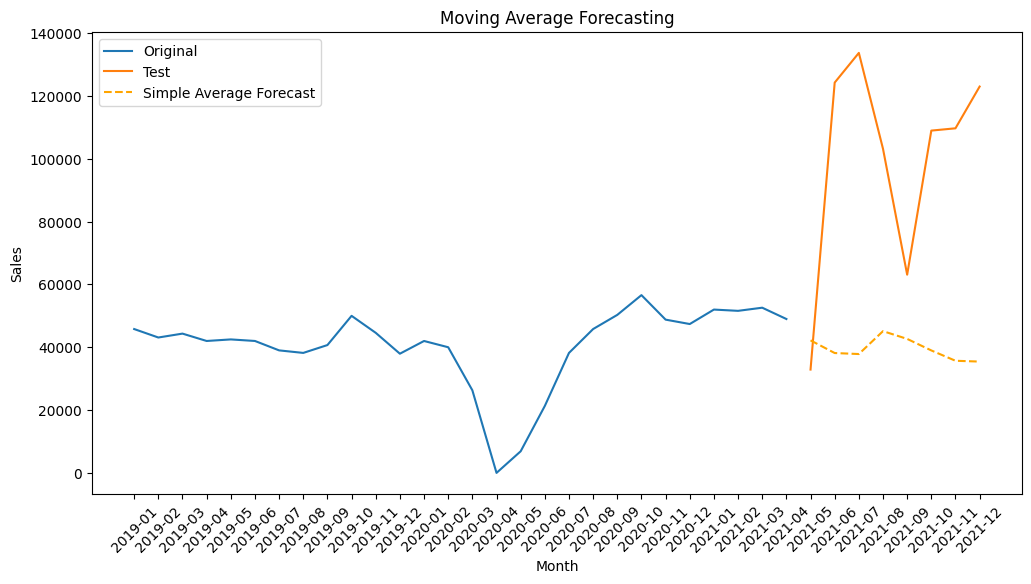

In [117]:
plt.figure(figsize=(12, 6))
plt.plot(train_Hyundai.index, train_Hyundai, label='Original')
plt.plot(test_Hyundai.index, test_Hyundai, label='Test')
plt.plot(test_Hyundai.index, forecast_values_sma_Hyundai, label='Simple Average Forecast', linestyle='--', color='orange')
plt.title('Moving Average Forecasting')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks( rotation=45)
plt.legend()
plt.show()

In [118]:
# Calculate Mean Absolute Error (MAE)
mae_1_Hyundai = mean_absolute_error(test_Hyundai, forecast_values_sma_Hyundai)
print(f"Mean Absolute Error (MAE): {mae_1_Hyundai}")

# Calculate Mean Squared Error (MSE)
mse_1_Hyundai = mean_squared_error(test_Hyundai, forecast_values_sma_Hyundai)
print(f"Mean Squared Error (MSE): {mse_1_Hyundai}")

rmse_1_Hyundai = np.sqrt(mse_1_Hyundai)
print(f"Root Mean Squared Error (RMSE): {rmse_1_Hyundai}")

Mean Absolute Error (MAE): 62673.20833333333
Mean Squared Error (MSE): 4816461737.569444
Root Mean Squared Error (RMSE): 69400.73297573625


In [119]:
ma_rmse_per_Hyundai=(rmse_1_Hyundai/56605)*100
ma_rmse_per_Hyundai

122.60530514218928

#### Arima

In [120]:
# Grid Method
from statsmodels.tsa.arima.model import ARIMA
import itertools

# Define the range of p, d, and q values
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)

# Generate all possible combinations of p, d, and q values
parameters = itertools.product(p_values, d_values, q_values)

# Fit ARIMA models for all combinations and select the best model
best_aic = float("inf")
best_params = None
for param in parameters:
    try:
        model = ARIMA(Hyundai, order=param)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_params = param
    except:
        continue

print("Best AIC:", best_aic)
print("Best Parameters:", best_params)

c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mahim\AppData\Local\Programs\Python\Python312\L

Best AIC: 740.0706049507032
Best Parameters: (0, 1, 0)


c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [122]:
A_model_Hyundai = ARIMA(Hyundai, order=(0,1,0))  # Specify order (p, d, q)
fitted_model_Hyundai = A_model_Hyundai.fit()

# Example: Make forecasts
forecast_Hyundai = fitted_model_Hyundai.forecast(steps=12)

c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


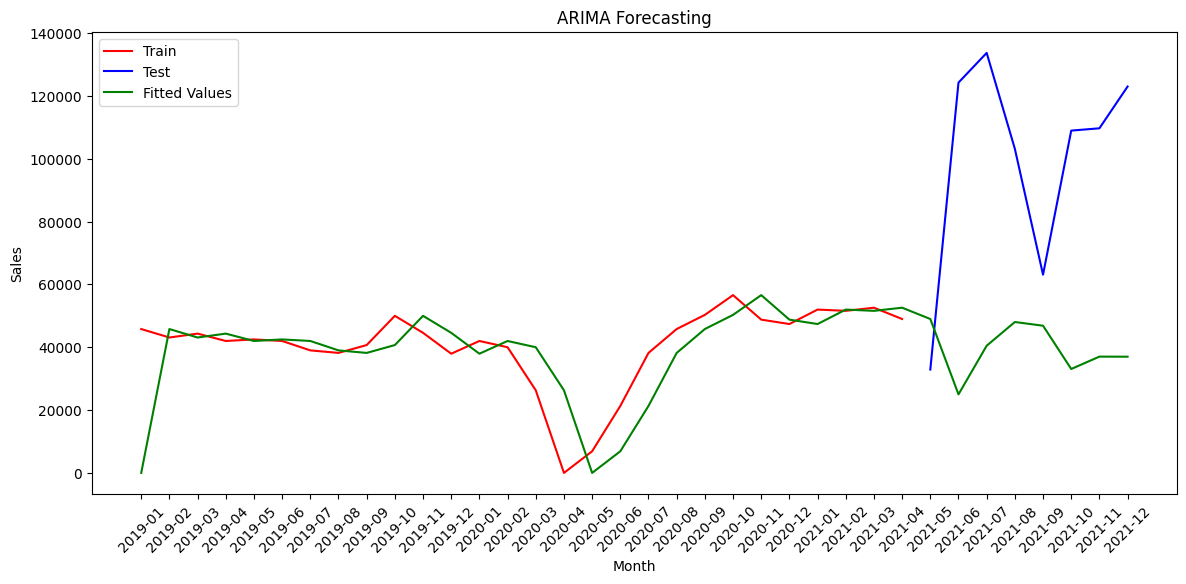

In [123]:
# Example: Visualize results
plt.figure(figsize=(14, 6))
plt.plot(train_Hyundai.index, train_Hyundai, label='Train', color='red')
plt.plot(test_Hyundai.index, test_Hyundai, label='Test',color='blue')
plt.plot(fitted_model_Hyundai.fittedvalues, color='green', label='Fitted Values')
plt.title('ARIMA Forecasting')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks( rotation=45)
plt.legend()
plt.show()

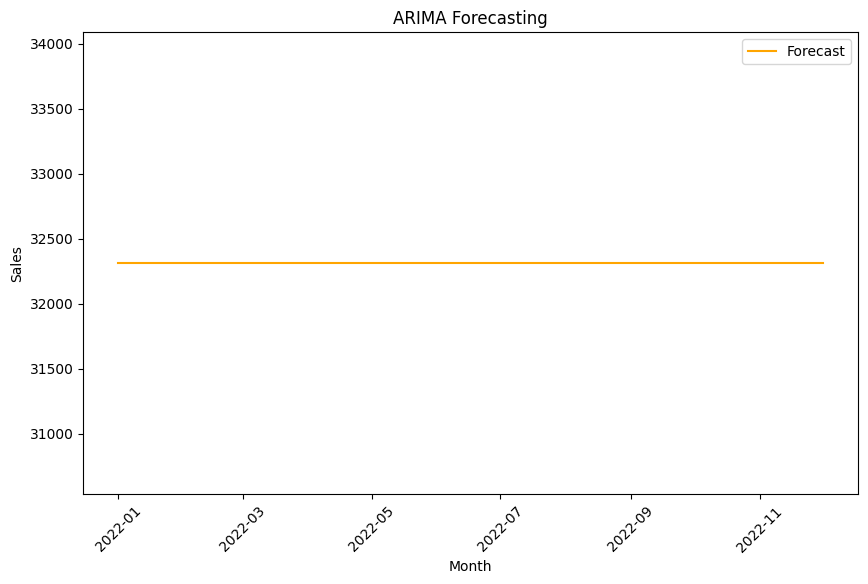

In [125]:
plt.figure(figsize=(10, 6))
plt.plot(forecast_Hyundai, color='orange', label='Forecast')
plt.title('ARIMA Forecasting')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks( rotation=45)
plt.legend()
plt.show()

In [126]:
A_forecast_values_Hyundai = fitted_model_Hyundai.forecast(steps=len(test_Hyundai))

# Calculate Mean Absolute Error (MAE)
mae_2_Hyundai = mean_absolute_error(test_Hyundai, A_forecast_values_Hyundai)
print(f"Mean Absolute Error (MAE): {mae_2_Hyundai}")

# Calculate Mean Squared Error (MSE)
mse_2_Hyundai = mean_squared_error(test_Hyundai, A_forecast_values_Hyundai)
print(f"Mean Squared Error (MSE): {mse_2_Hyundai}")

rmse_2_Hyundai = np.sqrt(mse_2_Hyundai)
print(f"Root Mean Squared Error (RMSE): {rmse_2_Hyundai}")

Mean Absolute Error (MAE): 67555.75
Mean Squared Error (MSE): 5601939436.0
Root Mean Squared Error (RMSE): 74846.10501555842


In [127]:
ar_rmse_per_Hyundai=(rmse_2_Hyundai/56605)*100
ar_rmse_per_Hyundai

132.22525398031698

#### SARIMA

In [128]:
from pmdarima import auto_arima

# Use auto_arima to search for the best-fitting SARIMA model
model = auto_arima(Hyundai, seasonal=True, m=12)
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   36
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -374.471
Date:                Mon, 25 Mar 2024   AIC                            756.941
Time:                        21:10:21   BIC                            763.276
Sample:                    01-01-2019   HQIC                           759.152
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.578e+04   9045.482      1.744      0.081   -1951.683    3.35e+04
ar.L1          0.9317      0.153      6.100      0.000       0.632       1.231
ar.L2         -0.3279      0.235     -1.397      0.1

In [221]:
S_model_Hyundai = SARIMAX(Hyundai, order=(2, 0, 0), seasonal_order=(0, 1, 1, 12))
S_fitted_model_Hyundai = S_model_Hyundai.fit()


c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [222]:
# Example: Make forecasts
S_forecast_Hyundai = S_fitted_model_Hyundai.forecast(steps=12)

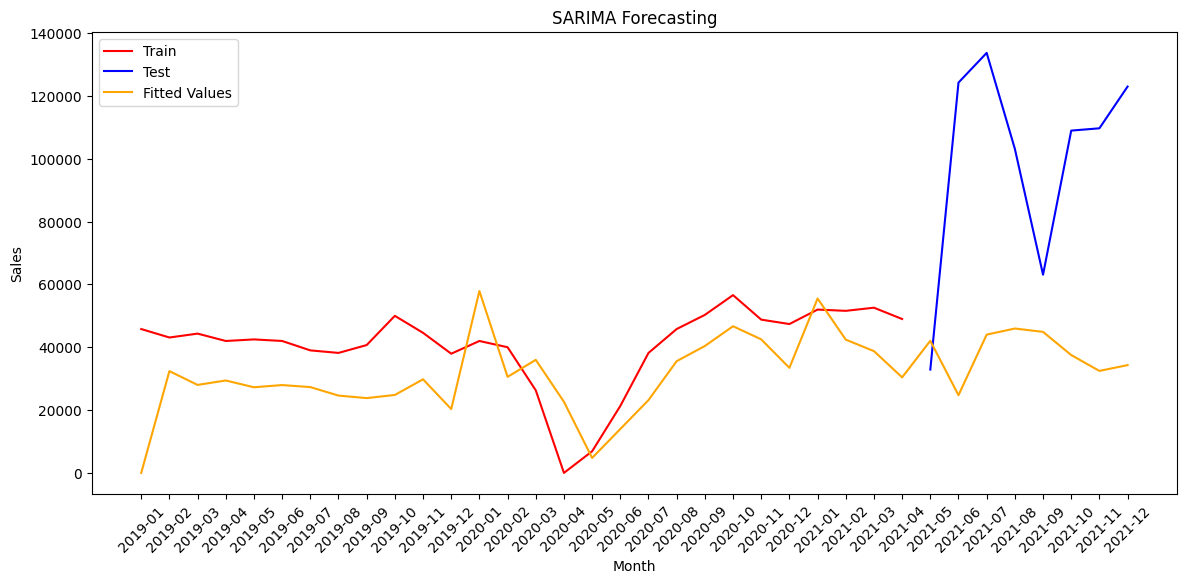

In [223]:
# Example: Visualize results
plt.figure(figsize=(14, 6))
plt.plot(train_Hyundai.index, train_Hyundai, label='Train', color='red')
plt.plot(test_Hyundai.index, test_Hyundai, label='Test',color='blue')
plt.plot(S_fitted_model_Hyundai.fittedvalues, color='orange', label='Fitted Values')
plt.title('SARIMA Forecasting')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks( rotation=45)
plt.legend()
plt.show()


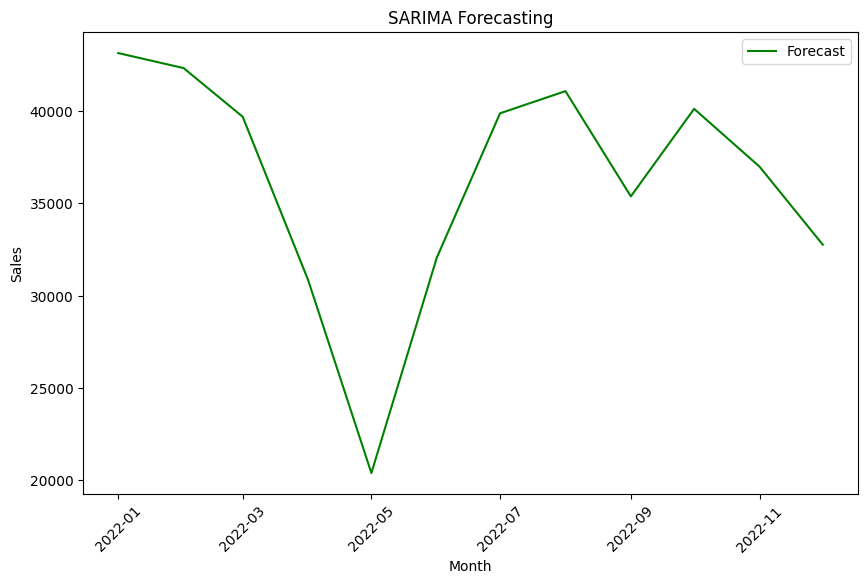

In [224]:
plt.figure(figsize=(10, 6))
plt.plot(S_forecast_Hyundai, color='green', label='Forecast')
plt.title('SARIMA Forecasting')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks( rotation=45)
plt.legend()
plt.show()

In [225]:
S_forecast_values_Hyundai = S_fitted_model_Hyundai.forecast(steps=len(test_Hyundai))

# Calculate Mean Absolute Error (MAE)
mae_3_Hyundai = mean_absolute_error(test_Hyundai, S_forecast_values_Hyundai)
print(f"Mean Absolute Error (MAE): {mae_3_Hyundai}")

# Calculate Mean Squared Error (MSE)
mse_3_Hyundai = mean_squared_error(test_Hyundai, S_forecast_values_Hyundai)
print(f"Mean Squared Error (MSE): {mse_3_Hyundai}")

rmse_3_Hyundai = np.sqrt(mse_3_Hyundai)
print(f"Root Mean Squared Error (RMSE): {rmse_3_Hyundai}")

Mean Absolute Error (MAE): 66246.9233730409
Mean Squared Error (MSE): 5028651922.883129
Root Mean Squared Error (RMSE): 70912.98839340455


In [226]:
sar_rmse_per_Hyundai=(rmse_3_Hyundai/35300)*100
sar_rmse_per_Hyundai

200.88665267253413

### Graph Comparison

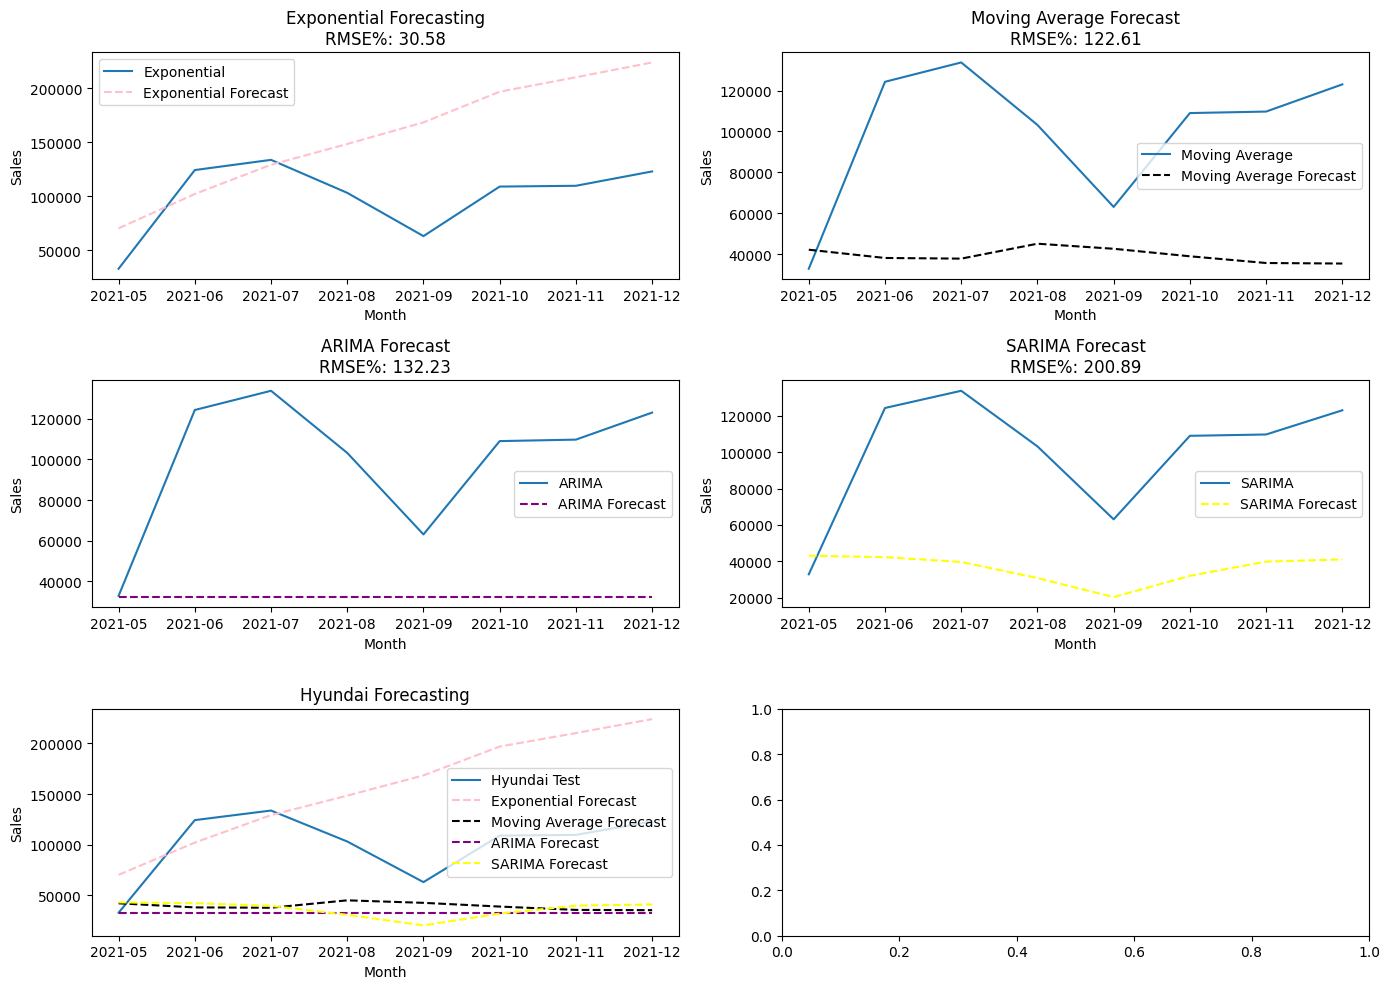

In [232]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))

# Plot for Exponential
axes[0, 0].plot(test_Hyundai.index, test_Hyundai, label='Exponential')
axes[0, 0].plot(test_Hyundai.index, forecast_values_Hyundai, label='Exponential Forecast', linestyle='--', color='pink')
axes[0, 0].set_title('Exponential Forecasting\nRMSE%: {:.2f}'.format(es_rmse_per_Hyundai))
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Sales')
axes[0, 0].legend()

# Plot for Moving
axes[0, 1].plot(test_Hyundai.index, test_Hyundai, label='Moving Average')
axes[0, 1].plot(test_Hyundai.index, forecast_values_sma_Hyundai, label='Moving Average Forecast', linestyle='--', color='black')
axes[0, 1].set_title('Moving Average Forecast\nRMSE%: {:.2f}'.format(ma_rmse_per_Hyundai))
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Sales')
axes[0, 1].legend()

# Plot for Simple
axes[1, 0].plot(test_Hyundai.index, test_Hyundai, label='ARIMA')
axes[1, 0].plot(test_Hyundai.index, A_forecast_values_Hyundai, label='ARIMA Forecast', linestyle='--', color='purple')
axes[1, 0].set_title('ARIMA Forecast\nRMSE%: {:.2f}'.format(ar_rmse_per_Hyundai))
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Sales')
axes[1, 0].legend()

# Plot for Simple
axes[1, 1].plot(test_Hyundai.index, test_Hyundai, label='SARIMA')
axes[1, 1].plot(test_Hyundai.index, S_forecast_values_Hyundai, label='SARIMA Forecast', linestyle='--', color='yellow')
axes[1, 1].set_title('SARIMA Forecast\nRMSE%: {:.2f}'.format(sar_rmse_per_Hyundai))
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Sales')
axes[1, 1].legend()

# Plot for Pant
axes[2, 0].plot(test_Hyundai.index, test_Hyundai, label='Hyundai Test')
axes[2, 0].plot(test_Hyundai.index, forecast_values_Hyundai, label='Exponential Forecast', linestyle='--', color='pink')
axes[2, 0].plot(test_Hyundai.index, forecast_values_sma_Hyundai, label='Moving Average Forecast', linestyle='--', color='black')
axes[2, 0].plot(test_Hyundai.index, A_forecast_values_Hyundai, label='ARIMA Forecast', linestyle='--', color='purple')
axes[2, 0].plot(test_Hyundai.index, S_forecast_values_Hyundai, label='SARIMA Forecast', linestyle='--', color='yellow')
axes[2, 0].set_title('Hyundai Forecasting')
axes[2, 0].set_xlabel('Month')
axes[2, 0].set_ylabel('Sales')
axes[2, 0].legend()

# Adjust layout
plt.tight_layout()
plt.show()

## Kia

In [188]:
train_size_Kia = int(len(Kia) * 0.8)  # Use 80% of the data for training
train_Kia, test_Kia = Hyundai[:train_size_Kia], Maruti_Suzuki[train_size_Kia:]

### Exponential Smoothing

In [189]:
model_Kia = ExponentialSmoothing(train_Kia, seasonal='add', seasonal_periods=12, trend='add', damped_trend=True)
fit_model_Kia = model_Kia.fit()

c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [190]:
forecast_values_Kia = fit_model_Kia.forecast(steps=8)

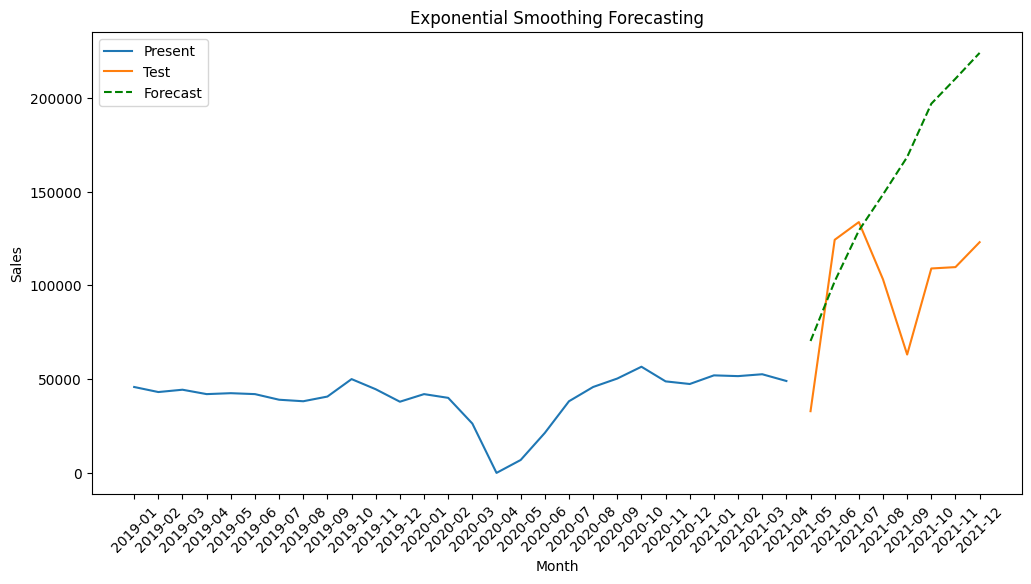

In [191]:
plt.figure(figsize=(12, 6))
plt.plot(train_Kia.index ,train_Kia, label='Present')
plt.plot(test_Kia.index, test_Kia, label='Test')
plt.plot(test_Kia.index ,forecast_values_Kia, label='Forecast', linestyle='--', color='green')
plt.title('Exponential Smoothing Forecasting')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks( rotation=45)
plt.legend()
plt.show()

In [192]:
# Calculate Mean Absolute Error (MAE)
mae_Kia = mean_absolute_error(test_Kia, forecast_values_Kia)
print(f"Mean Absolute Error (MAE): {mae_Kia}")

# Calculate Mean Squared Error (MSE)
mse_Kia = mean_squared_error(test_Kia, forecast_values_Kia)
print(f"Mean Squared Error (MSE): {mse_Kia}")

rmse_Kia = np.sqrt(mse_Kia)
print(f"Root Mean Squared Error (RMSE): {rmse_Kia}")

Mean Absolute Error (MAE): 62992.378310621
Mean Squared Error (MSE): 5381352100.991295
Root Mean Squared Error (RMSE): 73357.69967080004


In [193]:
es_rmse_per_Kia = (rmse_Kia/56605)*100
es_rmse_per_Kia

129.59579484285848

### Moving Average

In [194]:
# Calculate Simple Moving Average (SMA)
window_size = 3  # Adjust the window size as needed
sma_Kia = Kia.rolling(window=window_size).mean()
forecast_values_sma_Kia = sma_Kia[train_size_Kia:]

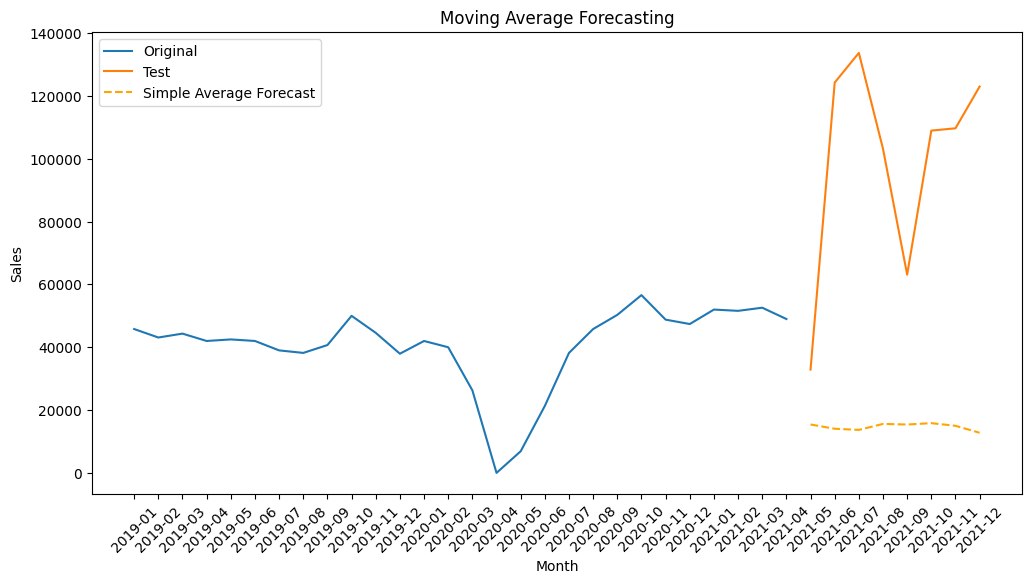

In [195]:
plt.figure(figsize=(12, 6))
plt.plot(train_Kia.index, train_Kia, label='Original')
plt.plot(test_Kia.index, test_Kia, label='Test')
plt.plot(test_Kia.index, forecast_values_sma_Kia, label='Simple Average Forecast', linestyle='--', color='orange')
plt.title('Moving Average Forecasting')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks( rotation=45)
plt.legend()
plt.show()

In [196]:
# Calculate Mean Absolute Error (MAE)
mae_1_Kia = mean_absolute_error(test_Kia, forecast_values_sma_Kia)
print(f"Mean Absolute Error (MAE): {mae_1_Kia}")

# Calculate Mean Squared Error (MSE)
mse_1_Kia = mean_squared_error(test_Kia, forecast_values_sma_Kia)
print(f"Mean Squared Error (MSE): {mse_1_Kia}")

rmse_1_Kia = np.sqrt(mse_1_Kia)
print(f"Root Mean Squared Error (RMSE): {rmse_1_Kia}")

Mean Absolute Error (MAE): 85144.58333333333
Mean Squared Error (MSE): 8326781379.694445
Root Mean Squared Error (RMSE): 91251.19933290983


In [197]:
ma_rmse_per_Kia=(rmse_1_Kia/56605)*100
ma_rmse_per_Kia

161.20695933735507

### ARIMA

In [198]:
# Grid Method
from statsmodels.tsa.arima.model import ARIMA
import itertools

# Define the range of p, d, and q values
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)

# Generate all possible combinations of p, d, and q values
parameters = itertools.product(p_values, d_values, q_values)

# Fit ARIMA models for all combinations and select the best model
best_aic = float("inf")
best_params = None
for param in parameters:
    try:
        model = ARIMA(Kia, order=param)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_params = param
    except:
        continue

print("Best AIC:", best_aic)
print("Best Parameters:", best_params)

c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mahim\AppData\Local\Programs\Python\Python312\L

Best AIC: 693.3744321214718
Best Parameters: (0, 1, 0)


In [199]:
A_model_Kia = ARIMA(Kia, order=(0,1,0))  # Specify order (p, d, q)
fitted_model_Kia = A_model_Kia.fit()

# Example: Make forecasts
forecast_Kia = fitted_model_Kia.forecast(steps=12)

c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


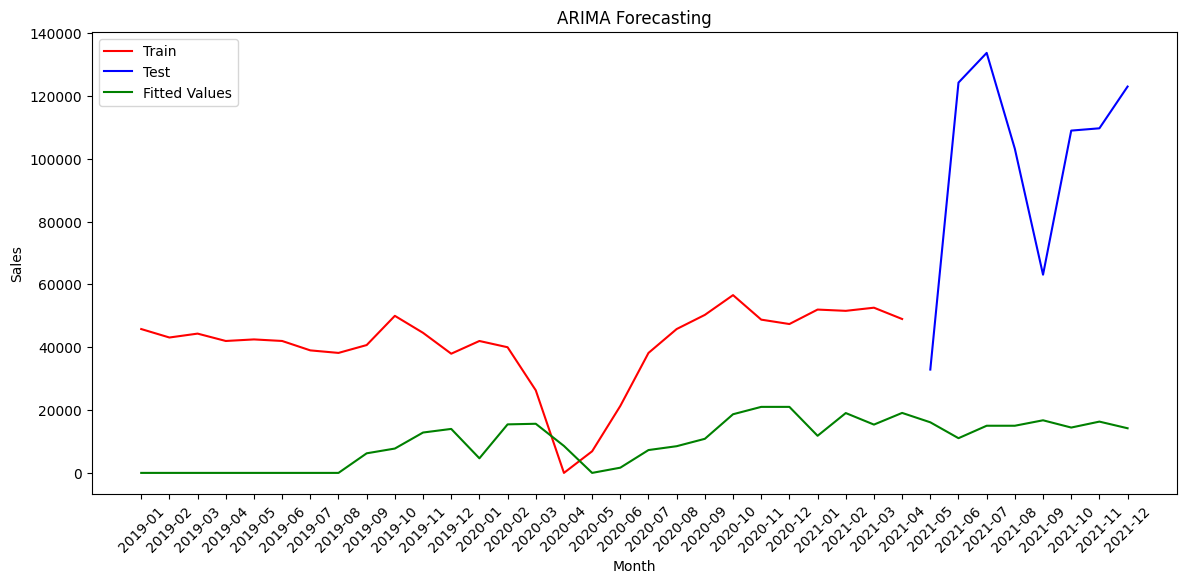

In [200]:
# Example: Visualize results
plt.figure(figsize=(14, 6))
plt.plot(train_Kia.index, train_Kia, label='Train', color='red')
plt.plot(test_Kia.index, test_Kia, label='Test',color='blue')
plt.plot(fitted_model_Kia.fittedvalues, color='green', label='Fitted Values')
plt.title('ARIMA Forecasting')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks( rotation=45)
plt.legend()
plt.show()

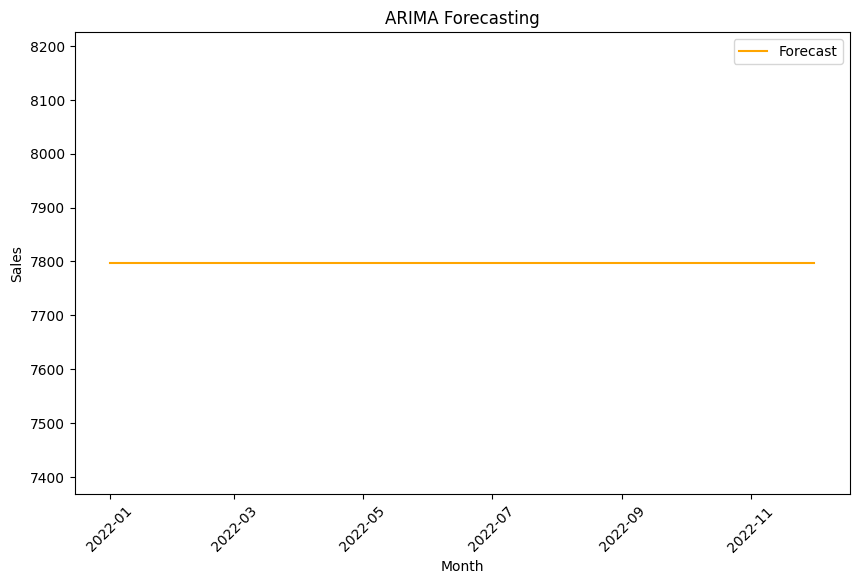

In [201]:
plt.figure(figsize=(10, 6))
plt.plot(forecast_Kia, color='orange', label='Forecast')
plt.title('ARIMA Forecasting')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks( rotation=45)
plt.legend()
plt.show()

In [207]:
A_forecast_values_Kia = fitted_model_Kia.forecast(steps=len(test_Kia))

# Calculate Mean Absolute Error (MAE)
mae_2_Kia = mean_absolute_error(test_Kia, A_forecast_values_Kia)
print(f"Mean Absolute Error (MAE): {mae_2_Hyundai}")

# Calculate Mean Squared Error (MSE)
mse_2_Kia = mean_squared_error(test_Kia, A_forecast_values_Kia)
print(f"Mean Squared Error (MSE): {mse_2_Kia}")

rmse_2_Kia = np.sqrt(mse_2_Hyundai)
print(f"Root Mean Squared Error (RMSE): {rmse_2_Kia}")

Mean Absolute Error (MAE): 67555.75
Mean Squared Error (MSE): 9515183083.5
Root Mean Squared Error (RMSE): 74846.10501555842


In [206]:
ar_rmse_per_Kia=(rmse_2_Kia/56605)*100
ar_rmse_per_Kia

132.22525398031698

### SARIMA

In [209]:
from pmdarima import auto_arima

# Use auto_arima to search for the best-fitting SARIMA model
model = auto_arima(Kia, seasonal=True, m=12)
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   36
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 12)   Log Likelihood                -343.117
Date:                            Mon, 25 Mar 2024   AIC                            690.235
Time:                                    21:39:13   BIC                            693.346
Sample:                                01-01-2019   HQIC                           691.309
                                     - 12-01-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.4086      0.170      2.405      0.016       0.076       0.742
sigma2      1.673e+07   3.52e+06   

In [211]:
S_model_Kia = SARIMAX(Kia, order=(0, 1, 0), seasonal_order=(1, 0, 0, 12))
S_fitted_model_Kia = S_model_Kia.fit()

c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [227]:
# Example: Make forecasts
S_forecast_Kia = S_fitted_model_Kia.forecast(steps=12)

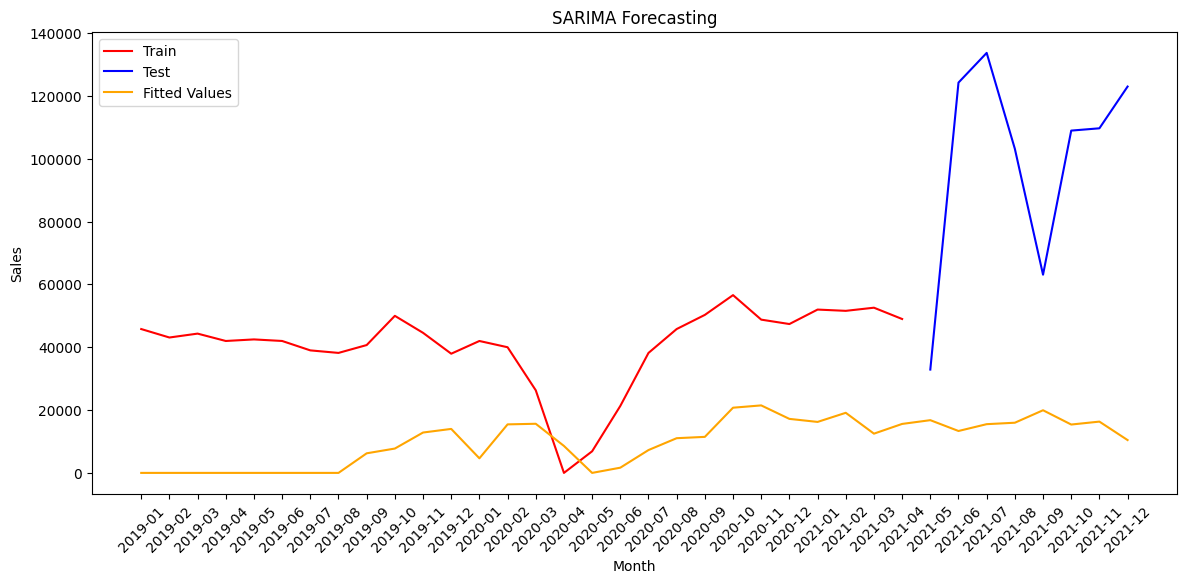

In [228]:
# Example: Visualize results
plt.figure(figsize=(14, 6))
plt.plot(train_Kia.index, train_Kia, label='Train', color='red')
plt.plot(test_Kia.index, test_Kia, label='Test',color='blue')
plt.plot(S_fitted_model_Kia.fittedvalues, color='orange', label='Fitted Values')
plt.title('SARIMA Forecasting')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks( rotation=45)
plt.legend()
plt.show()


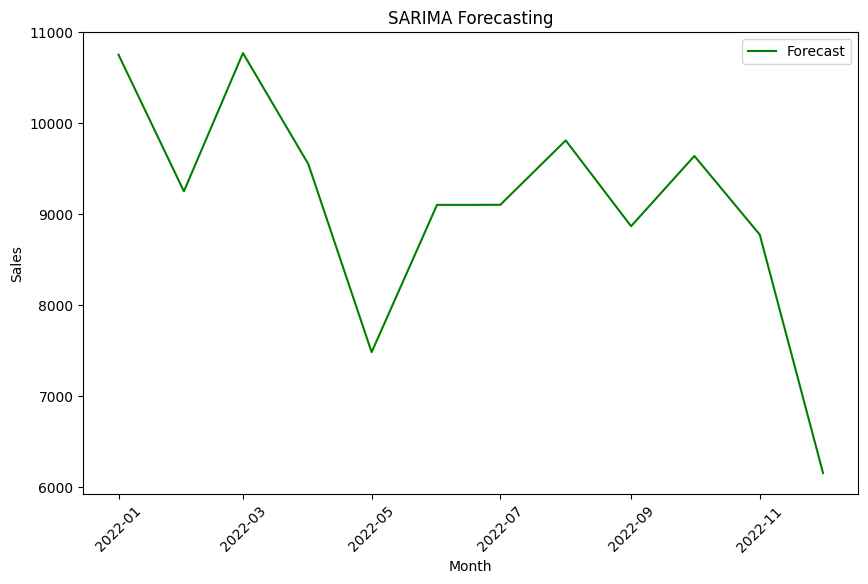

In [229]:
plt.figure(figsize=(10, 6))
plt.plot(S_forecast_Kia, color='green', label='Forecast')
plt.title('SARIMA Forecasting')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks( rotation=45)
plt.legend()
plt.show()

In [230]:
S_forecast_values_Kia = S_fitted_model_Kia.forecast(steps=len(test_Kia))

# Calculate Mean Absolute Error (MAE)
mae_3_Kia = mean_absolute_error(test_Kia, S_forecast_values_Kia)
print(f"Mean Absolute Error (MAE): {mae_3_Kia}")

# Calculate Mean Squared Error (MSE)
mse_3_Kia = mean_squared_error(test_Kia, S_forecast_values_Kia)
print(f"Mean Squared Error (MSE): {mse_3_Kia}")

rmse_3_Kia = np.sqrt(mse_3_Kia)
print(f"Root Mean Squared Error (RMSE): {rmse_3_Kia}")

Mean Absolute Error (MAE): 90388.67656335577
Mean Squared Error (MSE): 9202478083.31614
Root Mean Squared Error (RMSE): 95929.54749875629


In [231]:
sar_rmse_per_Kia=(rmse_3_Kia/35300)*100
sar_rmse_per_Kia

271.7550920644654

### Graph Comparison

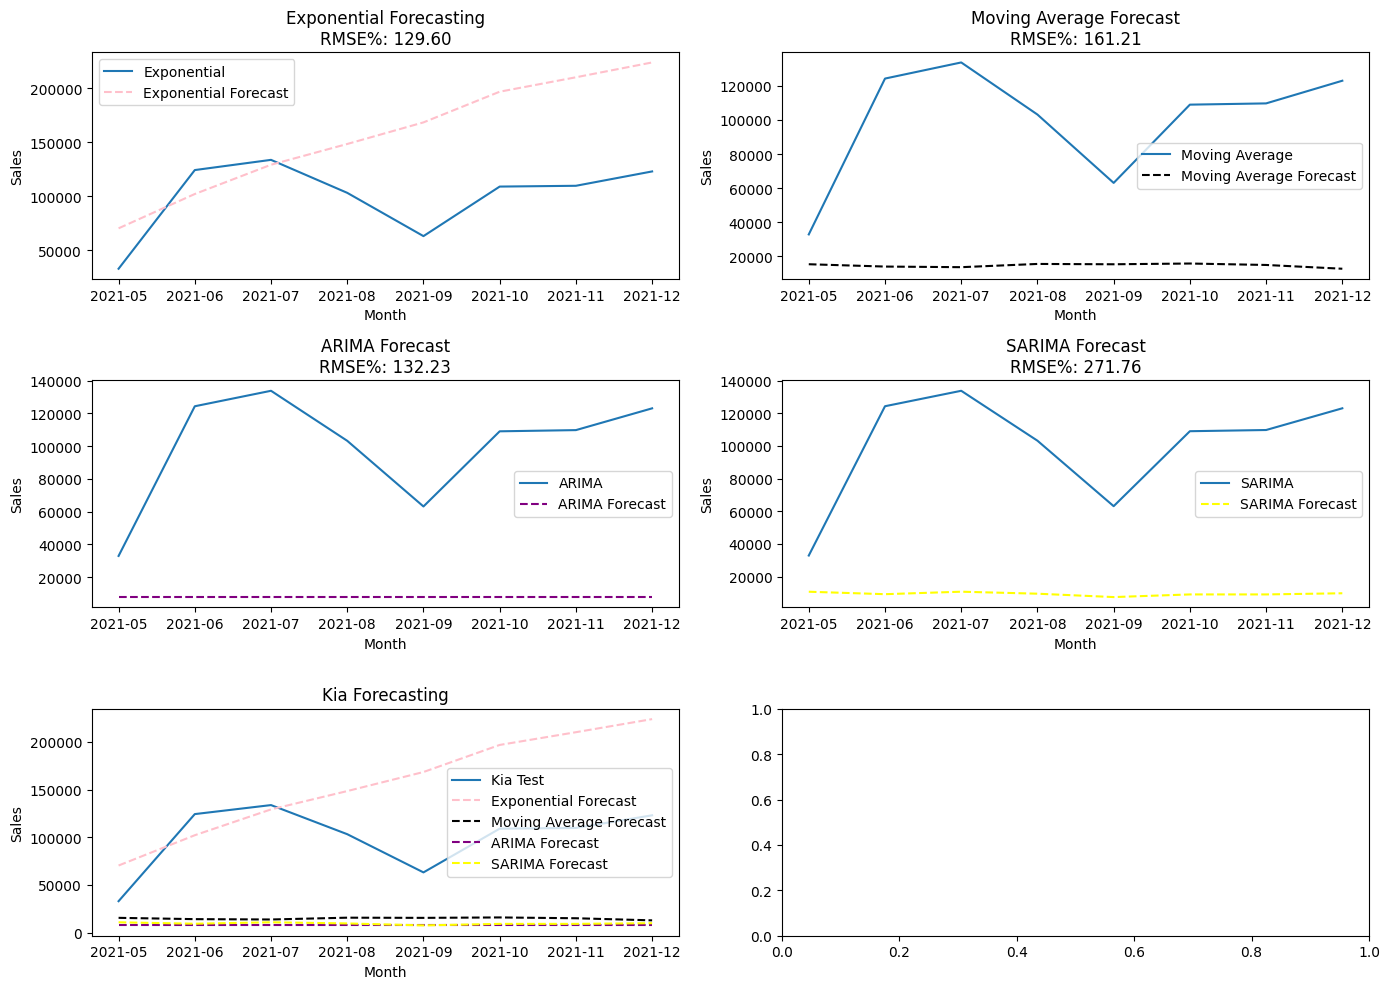

In [233]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))

# Plot for Exponential
axes[0, 0].plot(test_Kia.index, test_Kia, label='Exponential')
axes[0, 0].plot(test_Kia.index, forecast_values_Kia, label='Exponential Forecast', linestyle='--', color='pink')
axes[0, 0].set_title('Exponential Forecasting\nRMSE%: {:.2f}'.format(es_rmse_per_Kia))
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Sales')
axes[0, 0].legend()

# Plot for Moving
axes[0, 1].plot(test_Kia.index, test_Kia, label='Moving Average')
axes[0, 1].plot(test_Kia.index, forecast_values_sma_Kia, label='Moving Average Forecast', linestyle='--', color='black')
axes[0, 1].set_title('Moving Average Forecast\nRMSE%: {:.2f}'.format(ma_rmse_per_Kia))
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Sales')
axes[0, 1].legend()

# Plot for Simple
axes[1, 0].plot(test_Kia.index, test_Kia, label='ARIMA')
axes[1, 0].plot(test_Kia.index, A_forecast_values_Kia, label='ARIMA Forecast', linestyle='--', color='purple')
axes[1, 0].set_title('ARIMA Forecast\nRMSE%: {:.2f}'.format(ar_rmse_per_Kia))
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Sales')
axes[1, 0].legend()

# Plot for Simple
axes[1, 1].plot(test_Kia.index, test_Kia, label='SARIMA')
axes[1, 1].plot(test_Kia.index, S_forecast_values_Kia, label='SARIMA Forecast', linestyle='--', color='yellow')
axes[1, 1].set_title('SARIMA Forecast\nRMSE%: {:.2f}'.format(sar_rmse_per_Kia))
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Sales')
axes[1, 1].legend()

# Plot for Pant
axes[2, 0].plot(test_Kia.index, test_Hyundai, label='Kia Test')
axes[2, 0].plot(test_Kia.index, forecast_values_Kia, label='Exponential Forecast', linestyle='--', color='pink')
axes[2, 0].plot(test_Kia.index, forecast_values_sma_Kia, label='Moving Average Forecast', linestyle='--', color='black')
axes[2, 0].plot(test_Kia.index, A_forecast_values_Kia, label='ARIMA Forecast', linestyle='--', color='purple')
axes[2, 0].plot(test_Kia.index, S_forecast_values_Kia, label='SARIMA Forecast', linestyle='--', color='yellow')
axes[2, 0].set_title('Kia Forecasting')
axes[2, 0].set_xlabel('Month')
axes[2, 0].set_ylabel('Sales')
axes[2, 0].legend()

# Adjust layout
plt.tight_layout()
plt.show()

## Honda

In [234]:
train_size_Honda = int(len(Honda) * 0.8)  # Use 80% of the data for training
train_Honda, test_Honda = Honda[:train_size_Honda], Honda[train_size_Honda:]

### Exponential Smoothing

In [236]:
model_Honda = ExponentialSmoothing(train_Honda, seasonal='add', seasonal_periods=12, trend='add', damped_trend=True)
fit_model_Honda = model_Honda.fit()

c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


## Toyota

In [235]:
train_size_Toyota = int(len(Toyota) * 0.8)  # Use 80% of the data for training
train_Toyota, test_Toyota = Toyota[:train_size_Toyota], Honda[train_size_Toyota:]